In [7]:
import pandas as pd
import numpy as np
#Heirarchy --- seasonality when sku level signal weak



In [10]:
def convert(x):
    if x=="?":
        return np.nan
    else:
        return x

In [46]:
raw_data = pd.read_csv("Hackathon Data.csv",dtype={"Encoded_SKU_ID":str,"SUBCLASS_NAME":str,"CLASS_NAME":str,"ML_NAME":str,"CATEGORY_NAME":str,"RETAIL_PRICE":str,"PROMO_PRICE":str,"COMPETITOR_PRICE":str,"Inventory":"str","DAILY_UNITS":str},parse_dates=["SALES_DATE"],infer_datetime_format=True)

In [47]:
raw_data = raw_data.drop(["Unnamed: 11","Unnamed: 12","Unnamed: 13"],axis=1)

In [166]:
proc_data = raw_data.copy()

In [167]:
proc_data.shape

(942722, 11)

In [168]:
proc_data.head()

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,1
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,?,?,Fully-Stocked,18
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,46.98,Constrained,7
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,?,498,Fully-Stocked,6
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,7


In [169]:
proc_data.dtypes

Encoded_SKU_ID              object
SALES_DATE          datetime64[ns]
SUBCLASS_NAME               object
CLASS_NAME                  object
ML_NAME                     object
CATEGORY_NAME               object
RETAIL_PRICE                object
PROMO_PRICE                 object
COMPETITOR_PRICE            object
Inventory                   object
DAILY_UNITS                 object
dtype: object

In [170]:
name_cols = proc_data.columns[proc_data.columns.str.contains(pat="NAME")]
print(name_cols)
for col in name_cols:
    proc_data[col] = proc_data[col].astype("str",errors="raise")

Index(['SUBCLASS_NAME', 'CLASS_NAME', 'ML_NAME', 'CATEGORY_NAME'], dtype='object')


In [172]:
price_cols = proc_data.columns[proc_data.columns.str.contains(pat="PRICE")]
print(price_cols)
for col in price_cols:
    print(col)
    proc_data[col] = proc_data[col].replace("?",np.nan)
    proc_data[col] = proc_data[col].str.replace(",","")
    proc_data[col] = proc_data[col].astype("float64",errors="raise")

Index(['RETAIL_PRICE', 'PROMO_PRICE', 'COMPETITOR_PRICE'], dtype='object')
RETAIL_PRICE
PROMO_PRICE
COMPETITOR_PRICE


In [178]:
proc_data["Encoded_SKU_ID"] = proc_data["Encoded_SKU_ID"].astype("Int64",errors="raise")

In [181]:
proc_data["Inventory"] = proc_data["Inventory"].astype("str",errors="raise")
proc_data["DAILY_UNITS"] = proc_data["DAILY_UNITS"].str.replace(",","").astype("Int64",errors="raise")

proc_data.dtypes

Encoded_SKU_ID               Int64
SALES_DATE          datetime64[ns]
SUBCLASS_NAME               object
CLASS_NAME                  object
ML_NAME                     object
CATEGORY_NAME               object
RETAIL_PRICE               float64
PROMO_PRICE                float64
COMPETITOR_PRICE           float64
Inventory                   object
DAILY_UNITS                  Int64
dtype: object

In [182]:
proc_data.head()

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,1
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,18
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,NaN,46.98,Constrained,7
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,NaN,498.00,Fully-Stocked,6
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,7


In [184]:
proc_data.isna().sum()

Encoded_SKU_ID       96090
SALES_DATE           96090
SUBCLASS_NAME            0
CLASS_NAME               0
ML_NAME                  0
CATEGORY_NAME            0
RETAIL_PRICE         96090
PROMO_PRICE         796568
COMPETITOR_PRICE    631441
Inventory                0
DAILY_UNITS          96090
dtype: int64

<AxesSubplot:>

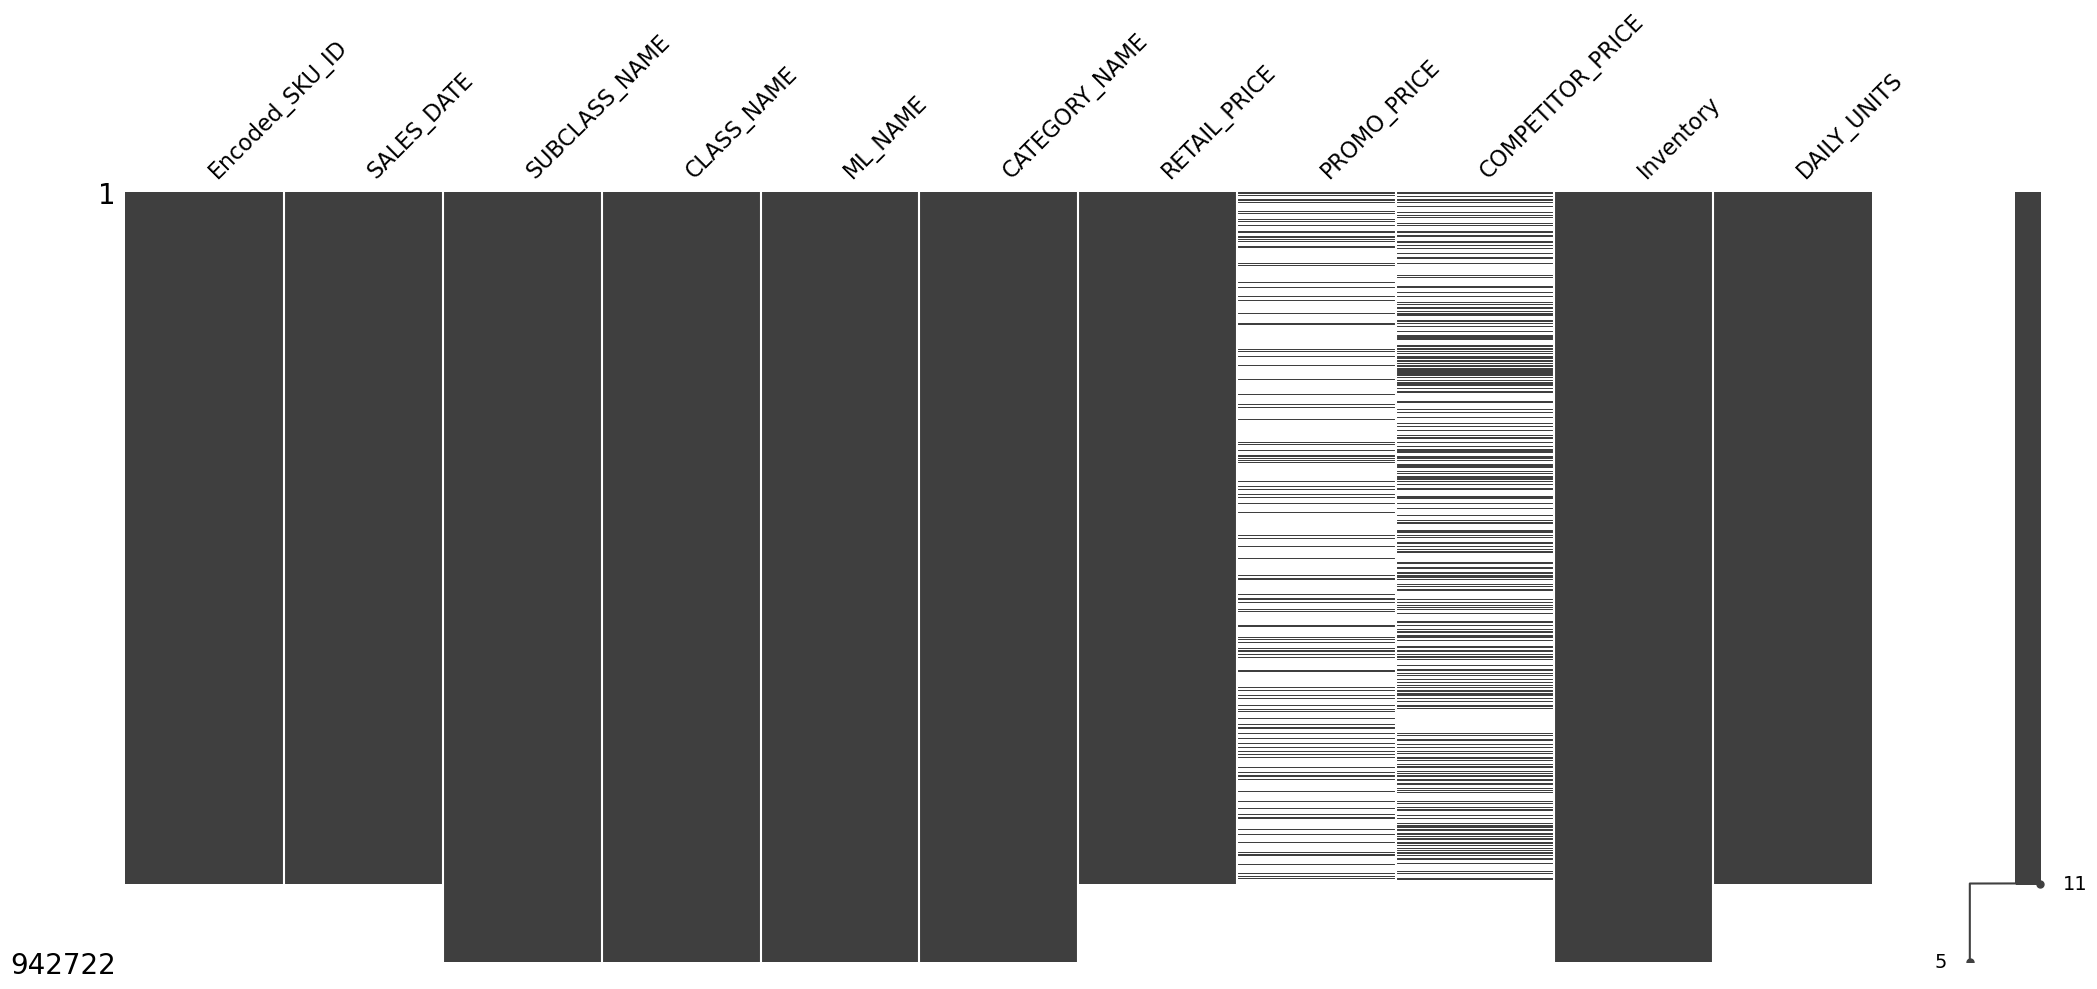

In [186]:
import missingno as msno
msno.matrix(proc_data)


In [ ]:
#Data in last rows seems to be missing for a lot of the variables
#Promo price and Competitor Price also have a lot of missing values

In [187]:
proc_data.columns

Index(['Encoded_SKU_ID', 'SALES_DATE', 'SUBCLASS_NAME', 'CLASS_NAME',
       'ML_NAME', 'CATEGORY_NAME', 'RETAIL_PRICE', 'PROMO_PRICE',
       'COMPETITOR_PRICE', 'Inventory', 'DAILY_UNITS'],
      dtype='object')

In [191]:
def print_uniques(data,col):
    print(f"Unique {col}:{proc_data[col].nunique()}")    

In [192]:
for col in ["Encoded_SKU_ID",'SUBCLASS_NAME', 'CLASS_NAME',\
       'ML_NAME', 'CATEGORY_NAME']:
       print_uniques(proc_data,col)

Unique Encoded_SKU_ID:575
Unique SUBCLASS_NAME:117
Unique CLASS_NAME:26
Unique ML_NAME:9
Unique CATEGORY_NAME:4


In [195]:
proc_data["SALES_DATE"].min(),proc_data["SALES_DATE"].max()

(Timestamp('2017-05-28 00:00:00'), Timestamp('2022-07-31 00:00:00'))

In [ ]:
# Data From May 2017 to Jul 31 2022

In [205]:
proc_data["CATEGORY_NAME"].unique()

array(['VP - Digital Imaging', 'VP - Electrify & Car',
       'VP - Major Appliances', 'nan'], dtype=object)

In [230]:
cat_unit_agg = proc_data.groupby(["SALES_DATE","CATEGORY_NAME"],as_index=False)["DAILY_UNITS"].sum()
cat_unit_agg

,SALES_DATE,CATEGORY_NAME,DAILY_UNITS
0,2017-05-28,VP - Digital Imaging,0
1,2017-05-28,VP - Electrify & Car,0
2,2017-05-29,VP - Digital Imaging,0
3,2017-05-29,VP - Electrify & Car,0
4,2017-05-30,VP - Digital Imaging,0
...,...,...,...
5369,2022-07-30,VP - Electrify & Car,705
5370,2022-07-30,VP - Major Appliances,456
5371,2022-07-31,VP - Digital Imaging,886
5372,2022-07-31,VP - Electrify & Car,580


<AxesSubplot:xlabel='SALES_DATE', ylabel='DAILY_UNITS'>

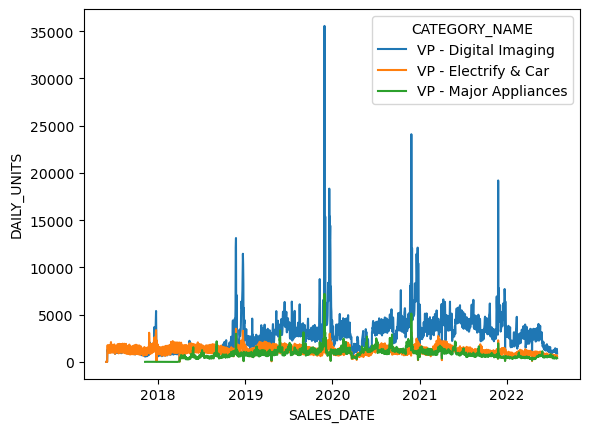

In [231]:
import seaborn as sns
sns.lineplot(data=cat_unit_agg,x="SALES_DATE",y="DAILY_UNITS",hue="CATEGORY_NAME")

In [210]:
proc_data.sort_values(by=["CATEGORY_NAME","ML_NAME"])[["CATEGORY_NAME","ML_NAME"]].drop_duplicates().reset_index(drop=True)

,CATEGORY_NAME,ML_NAME
0,VP - Digital Imaging,ML - DI Accessories
1,VP - Digital Imaging,ML - ILC Cameras/Lenses
2,VP - Digital Imaging,ML - P&S and Action Cams and Drones
3,VP - Electrify & Car,ML - Connected Car
4,VP - Electrify & Car,ML - Electrify
5,VP - Major Appliances,ML - Kitchen
6,VP - Major Appliances,ML - Laundry
7,VP - Major Appliances,ML - Premium
8,nan,nan


In [227]:
name_cols = ["CATEGORY_NAME","ML_NAME","CLASS_NAME","SUBCLASS_NAME"]

In [229]:
proc_data.sort_values(by=name_cols)[name_cols].drop_duplicates().to_csv("Taxonomy.csv",index=False)
#category information

In [243]:
proc_data.isna().sum()

Encoded_SKU_ID       96090
SALES_DATE           96090
SUBCLASS_NAME            0
CLASS_NAME               0
ML_NAME                  0
CATEGORY_NAME            0
RETAIL_PRICE         96090
PROMO_PRICE         796568
COMPETITOR_PRICE    631441
Inventory                0
DAILY_UNITS          96090
dtype: int64

In [250]:
proc = proc_data[~proc_data["Encoded_SKU_ID"].isna()]

In [348]:
proc.head()

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,1
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,18
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,NaN,46.98,Constrained,7
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,NaN,498.00,Fully-Stocked,6
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,7


In [428]:
sku_id = 2

In [429]:
sku_1 = proc.loc[proc["Encoded_SKU_ID"]==sku_id]

<AxesSubplot:xlabel='SALES_DATE', ylabel='DAILY_UNITS'>

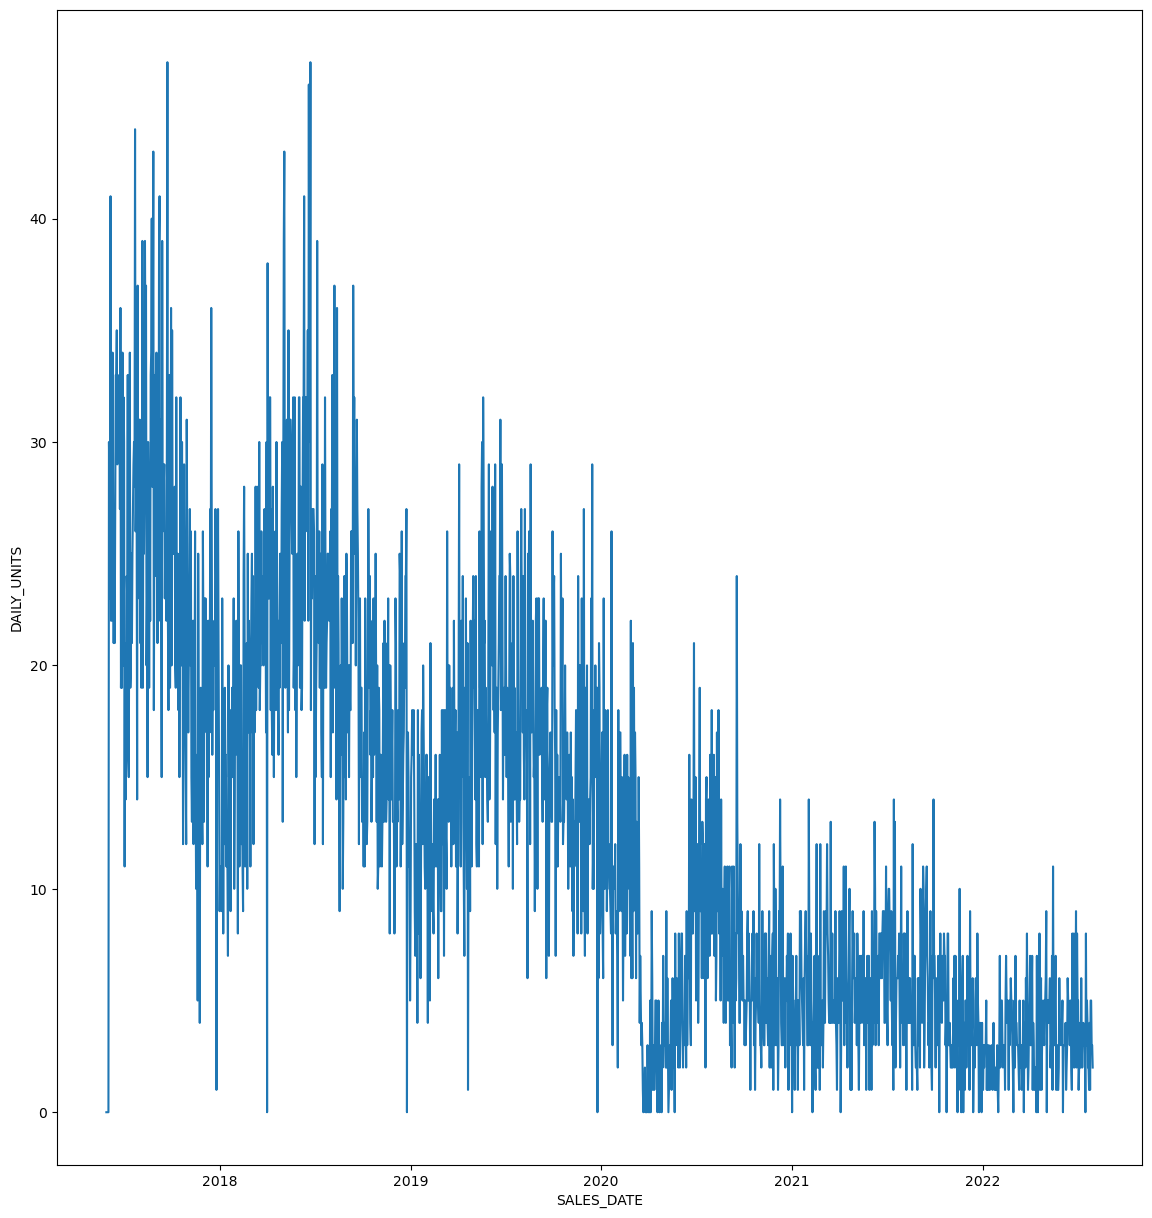

In [430]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,15))
sns.lineplot(data=sku_1,x="SALES_DATE",y="DAILY_UNITS")

In [469]:
proc["year"] = proc["SALES_DATE"].dt.year
proc["day_of_year"] = proc["SALES_DATE"].dt.month.astype(str) +"_"+ proc["SALES_DATE"].dt.day.astype(str)
proc

C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\2489700931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proc["year"] = proc["SALES_DATE"].dt.year
C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\2489700931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proc["day_of_year"] = proc["SALES_DATE"].dt.month.astype(str) +"_"+ proc["SALES_DATE"].dt.day.astype(str)


,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,year,day_of_year
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,1,2017,9_28
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,18,2017,11_24
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,NaN,46.98,Constrained,7,2019,11_28
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,NaN,498.00,Fully-Stocked,6,2021,4_21
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,7,2018,10_27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846627,67,2020-11-16,DRONE ACCESSORY,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,16.99,NaN,16.00,Fully-Stocked,0,2020,11_16
846628,482,2021-05-06,MOBILE PHONE MEDIA,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,17.99,NaN,NaN,Fully-Stocked,0,2021,5_6
846629,384,2021-09-25,SO CAR ACCESSORIES,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,16.99,NaN,15.72,Fully-Stocked,3,2021,9_25
846630,113,2018-11-08,CAMERA PRO PRODUCTS,DIGITAL CAMCORDERS,ML - P&S and Action Cams and Drones,VP - Digital Imaging,1899.99,NaN,NaN,Fully-Stocked,0,2018,11_8


<AxesSubplot:xlabel='day_of_year', ylabel='DAILY_UNITS'>

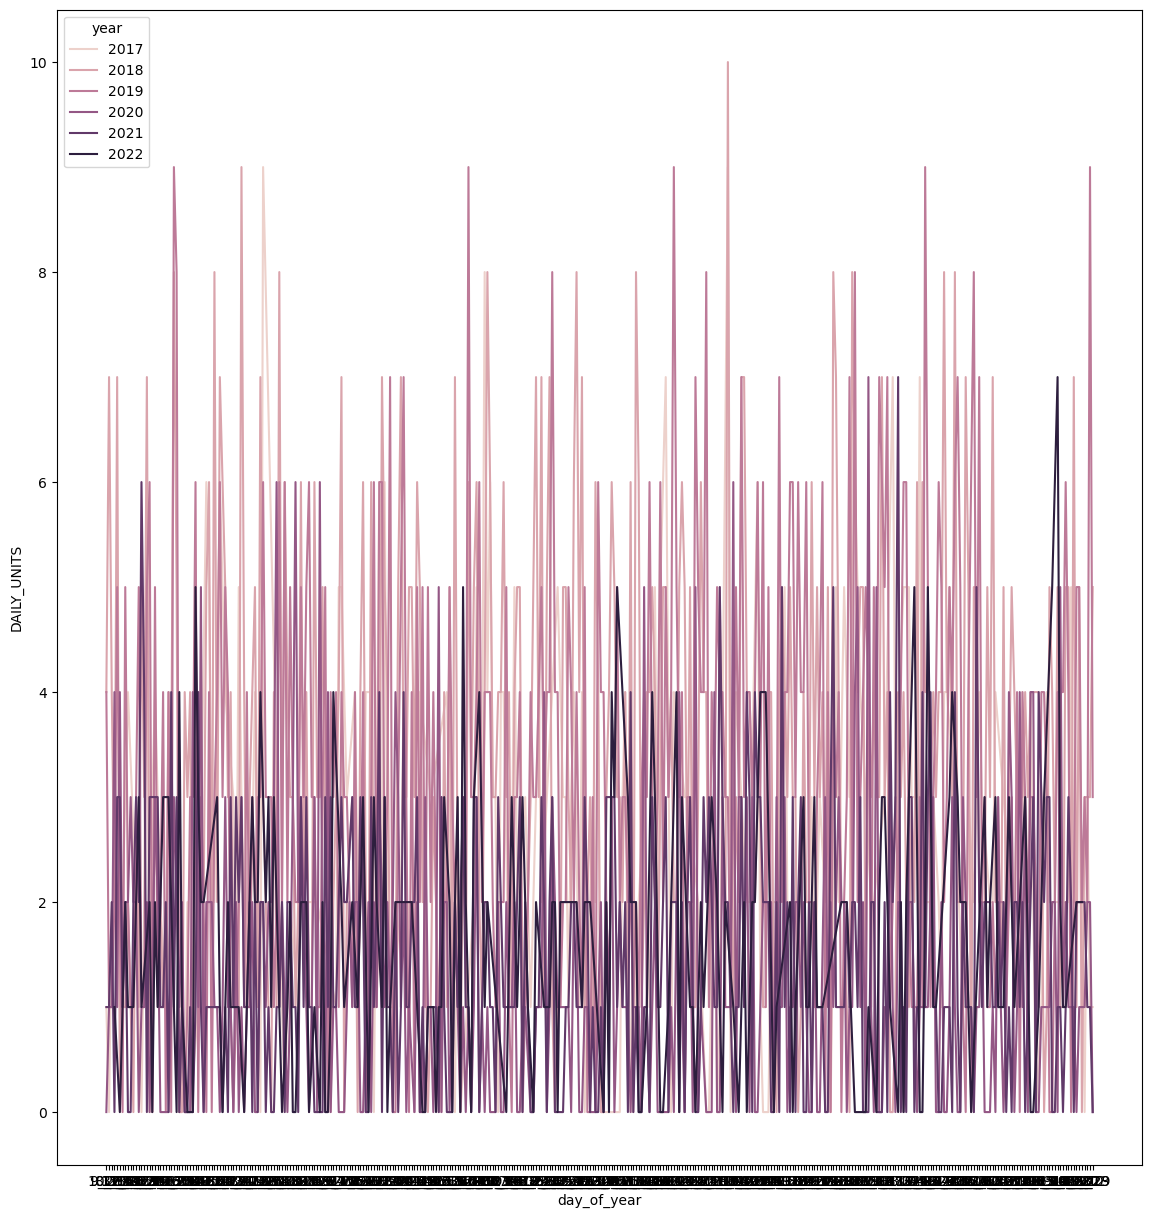

In [470]:
sku_1 = proc.loc[(proc["Encoded_SKU_ID"]==1)]
plt.figure(figsize=(14,15))
sns.lineplot(data=sku_1,x="day_of_year",y="DAILY_UNITS",hue="year")

<AxesSubplot:xlabel='SALES_DATE', ylabel='DAILY_UNITS'>

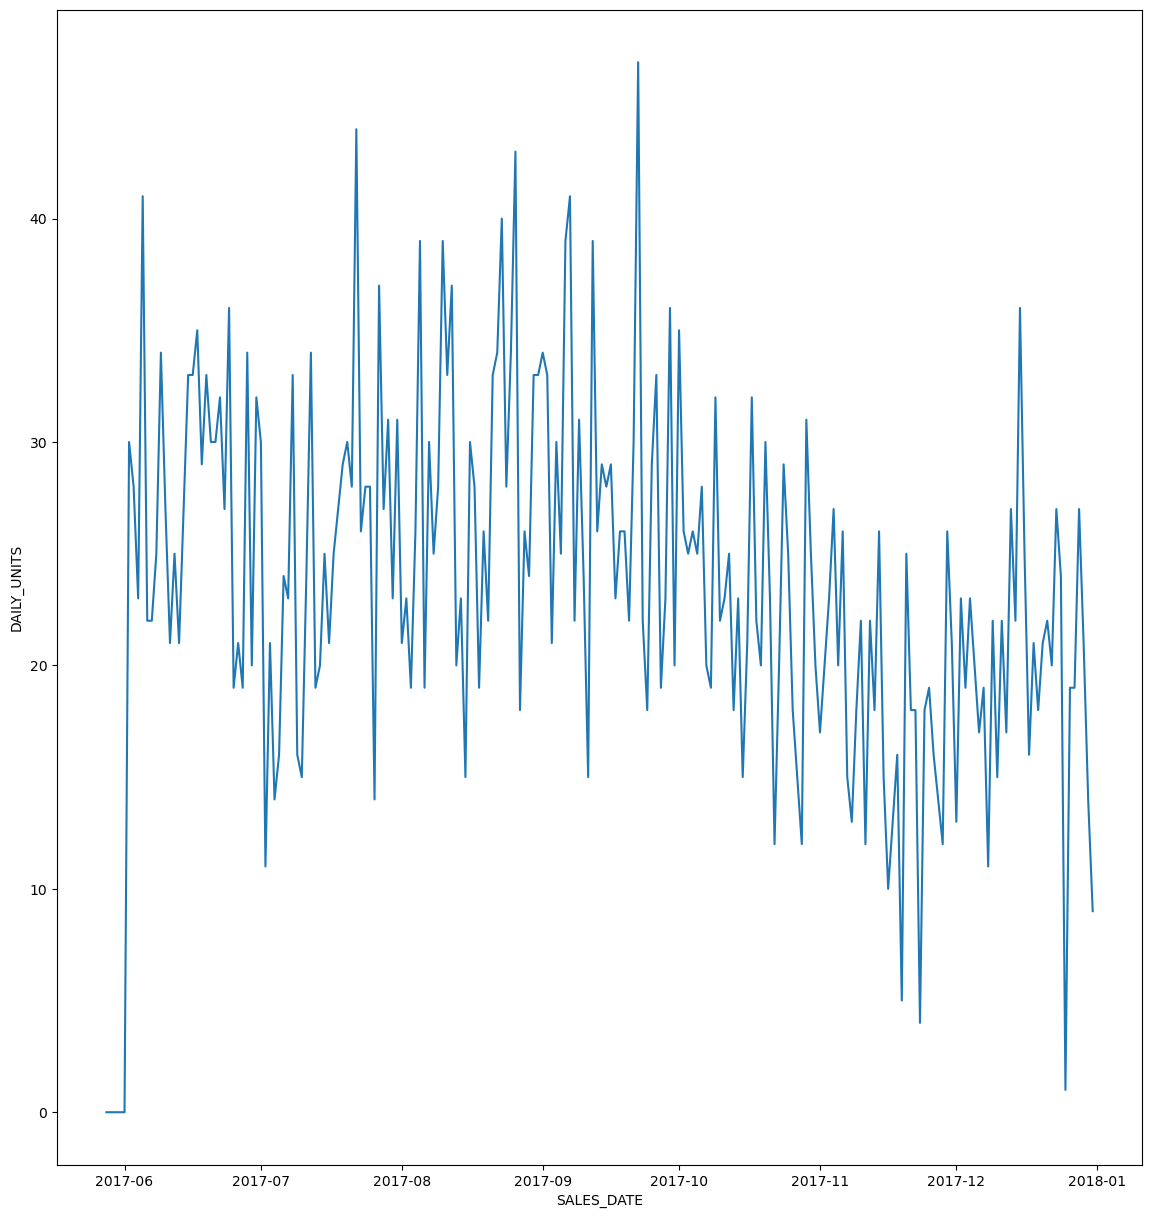

In [478]:
sku_1 = proc.loc[(proc["Encoded_SKU_ID"]==sku_id) & (proc.SALES_DATE.dt.year==2017)]
plt.figure(figsize=(14,15))
sns.lineplot(data=sku_1,x="SALES_DATE",y="DAILY_UNITS")

In [350]:
proc_data["DAILY_UNITS"].describe()

count    846632.000000
mean         10.532819
std          70.124984
min          -4.000000
25%           1.000000
50%           3.000000
75%           7.000000
max       19136.000000
Name: DAILY_UNITS, dtype: float64

In [433]:
sku_1 = proc.loc[(proc["Encoded_SKU_ID"]==sku_id)]
sku_1 = sku_1.sort_values(by="SALES_DATE")
print((sku_1["SALES_DATE"].max() - sku_1["SALES_DATE"].min()).days)


1890


In [434]:
start_date = sku_1["SALES_DATE"].min()
end_date = sku_1["SALES_DATE"].max()
date_range = pd.DataFrame({"date":pd.date_range(start=start_date,end=end_date,freq="D")})
sku_1_appended = date_range.merge(sku_1,left_on="date",right_on="SALES_DATE",how="left")
sku_1_appended

,date,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS
0,2017-05-28,2,2017-05-28,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Out-of-Stock,0
1,2017-05-29,2,2017-05-29,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Out-of-Stock,0
2,2017-05-30,2,2017-05-30,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Out-of-Stock,0
3,2017-05-31,2,2017-05-31,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Out-of-Stock,0
4,2017-06-01,2,2017-06-01,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Out-of-Stock,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1886,2022-07-27,2,2022-07-27,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,5
1887,2022-07-28,2,2022-07-28,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,5
1888,2022-07-29,2,2022-07-29,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,3
1889,2022-07-30,2,2022-07-30,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,3


In [435]:
sku_1.isna().sum()

Encoded_SKU_ID         0
SALES_DATE             0
SUBCLASS_NAME          0
CLASS_NAME             0
ML_NAME                0
CATEGORY_NAME          0
RETAIL_PRICE           0
PROMO_PRICE         1754
COMPETITOR_PRICE    1889
Inventory              0
DAILY_UNITS            0
dtype: int64

In [436]:
print(sku_1_appended["SALES_DATE"].nunique(),
sku_1_appended["date"].nunique())

1891 1891


In [437]:
sku_1_appended.isna().sum()

date                   0
Encoded_SKU_ID         0
SALES_DATE             0
SUBCLASS_NAME          0
CLASS_NAME             0
ML_NAME                0
CATEGORY_NAME          0
RETAIL_PRICE           0
PROMO_PRICE         1754
COMPETITOR_PRICE    1889
Inventory              0
DAILY_UNITS            0
dtype: int64

In [438]:
sku_1_appended["DAILY_UNITS"] = sku_1_appended["DAILY_UNITS"].fillna(0)

In [439]:
from pmdarima.arima import auto_arima

In [440]:
end_date    

Timestamp('2022-07-31 00:00:00')

In [441]:
train = sku_1_appended.set_index("date")["DAILY_UNITS"][:pd.to_datetime("2022-07-24")]

In [442]:
test = sku_1_appended.set_index("date")["DAILY_UNITS"][pd.to_datetime("2022-07-25"):]

In [443]:
test.shape

(7,)

In [444]:
model_object = auto_arima(y=train,random_state=42,m=7,seasonal=True)

In [445]:
model_object.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 1884
Model:             SARIMAX(0, 1, 1)x(0, 0, [1, 2], 7)   Log Likelihood               -5616.755
Date:                                Sun, 08 Jan 2023   AIC                          11241.510
Time:                                        17:59:17   BIC                          11263.672
Sample:                                    05-28-2017   HQIC                         11249.672
                                         - 07-24-2022                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8697      0.009    -97.064      0.000      -0.887      -0.852
ma.S.L7        0.0959      0.020      4.831      0.000       0.057       0.135
ma.S.L14       0.0877      0.021      4.185      0.000       0.047       0.129
sigma2        22.8073      0.467     48.859      0.000      21.892      23.722
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               812.01
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [446]:
test.shape[0]

7

In [447]:
pred = model_object.predict(n_periods=test.shape[0])


In [448]:
pred

2022-07-25    3.419203
2022-07-26    2.994522
2022-07-27    3.224673
2022-07-28    3.107942
2022-07-29    2.886110
2022-07-30    2.848421
2022-07-31    2.552997
Freq: D, dtype: float64

In [449]:
test

date
2022-07-25    4
2022-07-26    1
2022-07-27    5
2022-07-28    5
2022-07-29    3
2022-07-30    3
2022-07-31    2
Name: DAILY_UNITS, dtype: Int64

In [450]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test, [train[-1] for i in range(len(test))], squared=False),
mean_squared_error(test, pred, squared=False))

2.6726124191242437 1.2755313307530922


c:\Users\saksham\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
c:\Users\saksham\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [451]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [452]:
train

date
2017-05-28    0
2017-05-29    0
2017-05-30    0
2017-05-31    0
2017-06-01    0
             ..
2022-07-20    5
2022-07-21    4
2022-07-22    2
2022-07-23    2
2022-07-24    1
Name: DAILY_UNITS, Length: 1884, dtype: Int64

In [453]:
test

date
2022-07-25    4
2022-07-26    1
2022-07-27    5
2022-07-28    5
2022-07-29    3
2022-07-30    3
2022-07-31    2
Name: DAILY_UNITS, dtype: Int64

In [454]:
fit3 = SimpleExpSmoothing(train.astype(float), initialization_method="estimated").fit()
fcast3 = fit3.forecast(7).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])


c:\Users\saksham\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


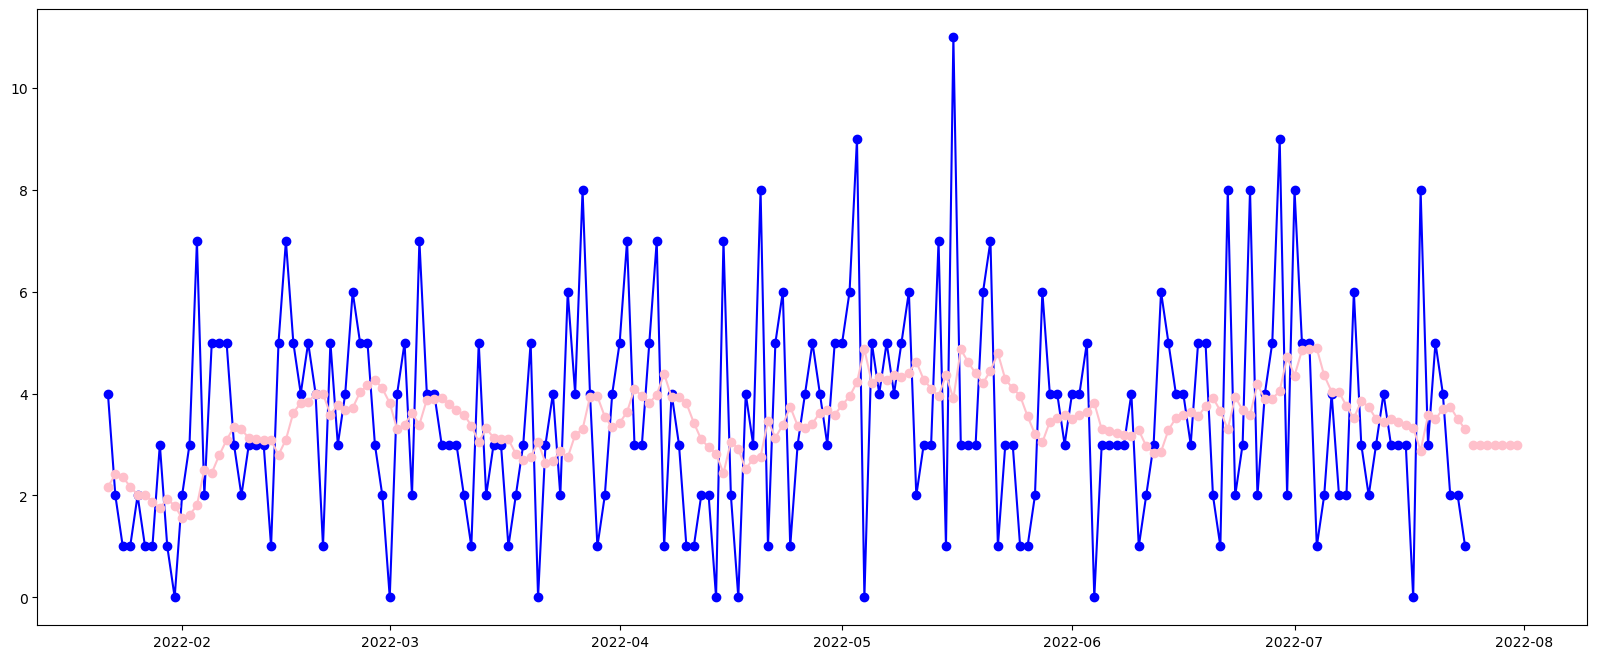

In [455]:
plt.figure(figsize=(20, 8))
plt.plot(train[1700:], marker="o", color="blue")
plt.plot(fit3.fittedvalues[1700:], marker="o", color="pink")
(line3,) = plt.plot(fcast3, marker="o", color="pink")


In [456]:
mean_squared_error(test,fcast3)

c:\Users\saksham\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


2.007262102576321

In [457]:
train.describe()

count    1884.000000
mean       12.611465
std         9.139260
min         0.000000
25%         5.000000
50%        11.000000
75%        19.000000
max        47.000000
Name: DAILY_UNITS, dtype: float64

In [ ]:
#See SKUs which have low variance
proc_data

In [351]:
data = pd.read_excel("Hackathon Data.xlsx")
data.to_csv("Hackathon Data Compressed.zip",index=False,compression='gzip')

In [356]:
data.to_csv("Hackathon Data Compressed.zip",index=False,compression='gzip')

In [357]:
proc_data

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,1
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,?,?,Fully-Stocked,18
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,46.98,Constrained,7
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,?,498,Fully-Stocked,6
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,7
...,...,...,...,...,...,...,...,...,...,...,...
846627,67,2020-11-16,DRONE ACCESSORY,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,16.99,?,16,Fully-Stocked,0
846628,482,2021-05-06,MOBILE PHONE MEDIA,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,17.99,?,?,Fully-Stocked,0
846629,384,2021-09-25,SO CAR ACCESSORIES,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,16.99,?,15.72,Fully-Stocked,3
846630,113,2018-11-08,CAMERA PRO PRODUCTS,DIGITAL CAMCORDERS,ML - P&S and Action Cams and Drones,VP - Digital Imaging,1899.99,?,?,Fully-Stocked,0


(942722, 11)

In [404]:
proc.shape

(846632, 11)

In [405]:
proc

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,1
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,18
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,NaN,46.98,Constrained,7
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,NaN,498.00,Fully-Stocked,6
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,7
...,...,...,...,...,...,...,...,...,...,...,...
846627,67,2020-11-16,DRONE ACCESSORY,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,16.99,NaN,16.00,Fully-Stocked,0
846628,482,2021-05-06,MOBILE PHONE MEDIA,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,17.99,NaN,NaN,Fully-Stocked,0
846629,384,2021-09-25,SO CAR ACCESSORIES,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,16.99,NaN,15.72,Fully-Stocked,3
846630,113,2018-11-08,CAMERA PRO PRODUCTS,DIGITAL CAMCORDERS,ML - P&S and Action Cams and Drones,VP - Digital Imaging,1899.99,NaN,NaN,Fully-Stocked,0


In [406]:
data_sparsity = proc.groupby("Encoded_SKU_ID",as_index=False)["SALES_DATE"].agg({"min":np.min,"max":np.max,"unique_non_0":lambda x:x.nunique()})

In [409]:
(proc.DAILY_UNITS==0).sum()/proc.DAILY_UNITS.shape[0]

0.17363388107229588

In [410]:
data_sparsity_2 = proc.groupby("Encoded_SKU_ID",as_index=False)["DAILY_UNITS"].agg({"non_0":lambda x : (x!=0).sum()})

In [412]:
data_sparsity_2

,Encoded_SKU_ID,non_0
0,1,1544
1,2,1852
2,3,1441
3,4,1123
4,5,1803
...,...,...
570,571,847
571,572,581
572,573,941
573,574,724


In [413]:
data_sparsity = data_sparsity.merge(data_sparsity_2,on="Encoded_SKU_ID",how="left")

In [414]:
data_sparsity

,Encoded_SKU_ID,min,max,unique,non_0
0,1,2017-05-28,2022-07-31,1884,1544
1,2,2017-05-28,2022-07-31,1891,1852
2,3,2017-06-04,2022-07-31,1838,1441
3,4,2018-04-01,2022-07-31,1197,1123
4,5,2017-05-28,2022-07-31,1891,1803
...,...,...,...,...,...
570,571,2019-05-26,2022-07-31,1044,847
571,572,2020-10-11,2022-07-31,659,581
572,573,2019-07-28,2022-07-31,1100,941
573,574,2020-03-15,2022-07-31,869,724


In [416]:
data_sparsity["diff"] = (data_sparsity["max"] - data_sparsity["min"]).dt.days

In [420]:
data_sparsity["empty_prop"] = 1 - data_sparsity["non_0"]/data_sparsity["diff"]

In [421]:
data_sparsity

,Encoded_SKU_ID,min,max,unique,non_0,diff,empty_prop
0,1,2017-05-28,2022-07-31,1884,1544,1890,0.183069
1,2,2017-05-28,2022-07-31,1891,1852,1890,0.020106
2,3,2017-06-04,2022-07-31,1838,1441,1883,0.234732
3,4,2018-04-01,2022-07-31,1197,1123,1582,0.290139
4,5,2017-05-28,2022-07-31,1891,1803,1890,0.046032
...,...,...,...,...,...,...,...
570,571,2019-05-26,2022-07-31,1044,847,1162,0.271084
571,572,2020-10-11,2022-07-31,659,581,658,0.117021
572,573,2019-07-28,2022-07-31,1100,941,1099,0.143767
573,574,2020-03-15,2022-07-31,869,724,868,0.165899


In [422]:
data_sparsity["empty_prop"].describe()

count    575.000000
mean       0.201735
std        0.169827
min       -0.001222
25%        0.055293
50%        0.150265
75%        0.315795
max        0.732102
Name: empty_prop, dtype: float64

In [ ]:
#50% SKUs have >15% sparsity or 0 values
#25% SKUS have >30% sparsity or 0 values

In [424]:
data_sparsity[data_sparsity["empty_prop"]<0.05]

,Encoded_SKU_ID,min,max,unique,non_0,diff,empty_prop
1,2,2017-05-28,2022-07-31,1891,1852,1890,0.020106
4,5,2017-05-28,2022-07-31,1891,1803,1890,0.046032
5,6,2017-05-28,2022-07-31,1891,1880,1890,0.005291
7,8,2019-09-29,2022-07-31,1037,1005,1036,0.029923
8,9,2017-05-28,2022-07-31,1891,1831,1890,0.031217
...,...,...,...,...,...,...,...
555,556,2017-05-28,2022-07-31,1891,1814,1890,0.040212
556,557,2020-09-15,2022-07-31,685,684,684,0.0
557,558,2018-04-01,2022-07-31,1583,1517,1582,0.041087
558,559,2020-01-26,2022-07-31,918,881,917,0.039258


In [479]:
proc

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,year,day_of_year
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,1,2017,9_28
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,18,2017,11_24
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,NaN,46.98,Constrained,7,2019,11_28
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,NaN,498.00,Fully-Stocked,6,2021,4_21
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,7,2018,10_27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846627,67,2020-11-16,DRONE ACCESSORY,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,16.99,NaN,16.00,Fully-Stocked,0,2020,11_16
846628,482,2021-05-06,MOBILE PHONE MEDIA,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,17.99,NaN,NaN,Fully-Stocked,0,2021,5_6
846629,384,2021-09-25,SO CAR ACCESSORIES,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,16.99,NaN,15.72,Fully-Stocked,3,2021,9_25
846630,113,2018-11-08,CAMERA PRO PRODUCTS,DIGITAL CAMCORDERS,ML - P&S and Action Cams and Drones,VP - Digital Imaging,1899.99,NaN,NaN,Fully-Stocked,0,2018,11_8


In [483]:
proc.groupby(["CATEGORY_NAME",	"ML_NAME","CLASS_NAME",	"SUBCLASS_NAME"],as_index=False)["Encoded_SKU_ID"].nunique().sort_values(by="Encoded_SKU_ID").reset_index(drop=True).to_csv("Category SKU num.csv")

In [485]:
proc.groupby(["CATEGORY_NAME"],as_index=False)["Encoded_SKU_ID"].nunique().sort_values(by="Encoded_SKU_ID").reset_index(drop=True)

,CATEGORY_NAME,Encoded_SKU_ID
0,VP - Major Appliances,144
1,VP - Digital Imaging,186
2,VP - Electrify & Car,245


In [486]:
proc.groupby(["CATEGORY_NAME",	"ML_NAME"],as_index=False)["Encoded_SKU_ID"].nunique().sort_values(by="Encoded_SKU_ID").reset_index(drop=True)
# ,"CLASS_NAME",	"SUBCLASS_NAME"

,CATEGORY_NAME,ML_NAME,Encoded_SKU_ID
0,VP - Electrify & Car,ML - Electrify,1
1,VP - Major Appliances,ML - Premium,7
2,VP - Digital Imaging,ML - P&S and Action Cams and Drones,16
3,VP - Major Appliances,ML - Laundry,39
4,VP - Digital Imaging,ML - ILC Cameras/Lenses,42
5,VP - Major Appliances,ML - Kitchen,98
6,VP - Digital Imaging,ML - DI Accessories,128
7,VP - Electrify & Car,ML - Connected Car,244


In [487]:
proc.groupby(["CATEGORY_NAME",	"ML_NAME","CLASS_NAME"],as_index=False)["Encoded_SKU_ID"].nunique().sort_values(by="Encoded_SKU_ID").reset_index(drop=True)


,CATEGORY_NAME,ML_NAME,CLASS_NAME,Encoded_SKU_ID
0,VP - Major Appliances,ML - Kitchen,FREEZERS,1
1,VP - Electrify & Car,ML - Electrify,E-TRANSPORTATION,1
2,VP - Digital Imaging,ML - P&S and Action Cams and Drones,DRONES,1
3,VP - Major Appliances,ML - Kitchen,BUILT-IN REFRIGERATR,2
4,VP - Major Appliances,ML - Laundry,PEDESTALS & STACKING,2
5,VP - Electrify & Car,ML - Connected Car,GPS NAVIGATION,2
6,VP - Electrify & Car,ML - Connected Car,GPS ACCESSORIES,2
7,VP - Electrify & Car,ML - Connected Car,SATELLITE RADIO HDWE,6
8,VP - Digital Imaging,ML - P&S and Action Cams and Drones,DIGITAL CAMCORDERS,6
9,VP - Major Appliances,ML - Premium,PREMIUM MAJOR APPL,7


In [490]:
cat_agg = proc.groupby(["CATEGORY_NAME","SALES_DATE"],as_index=False)["DAILY_UNITS"].sum()
cat_vp_di = cat_agg[cat_agg["CATEGORY_NAME"]=="VP - Digital Imaging"]
cat_vp_di = cat_vp_di.drop(["CATEGORY_NAME"],axis=1).set_index("SALES_DATE")

<AxesSubplot:xlabel='SALES_DATE', ylabel='DAILY_UNITS'>

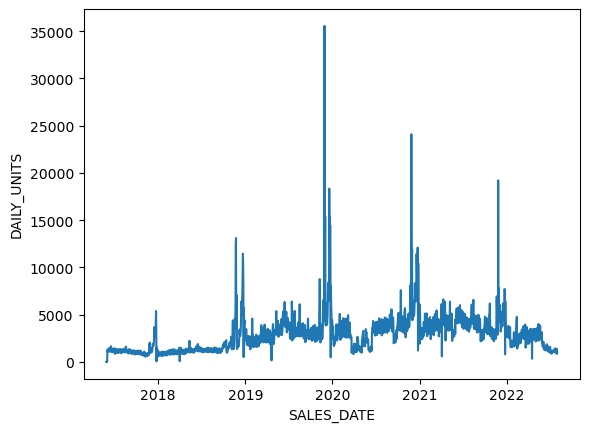

In [494]:
sns.lineplot(data= cat_vp_di,x="SALES_DATE",y="DAILY_UNITS")

In [501]:
cat_vp_di

,DAILY_UNITS
SALES_DATE,
2017-05-28,0
2017-05-29,0
2017-05-30,0
2017-05-31,0
2017-06-01,0
...,...
2022-07-27,923
2022-07-28,1021
2022-07-29,1227


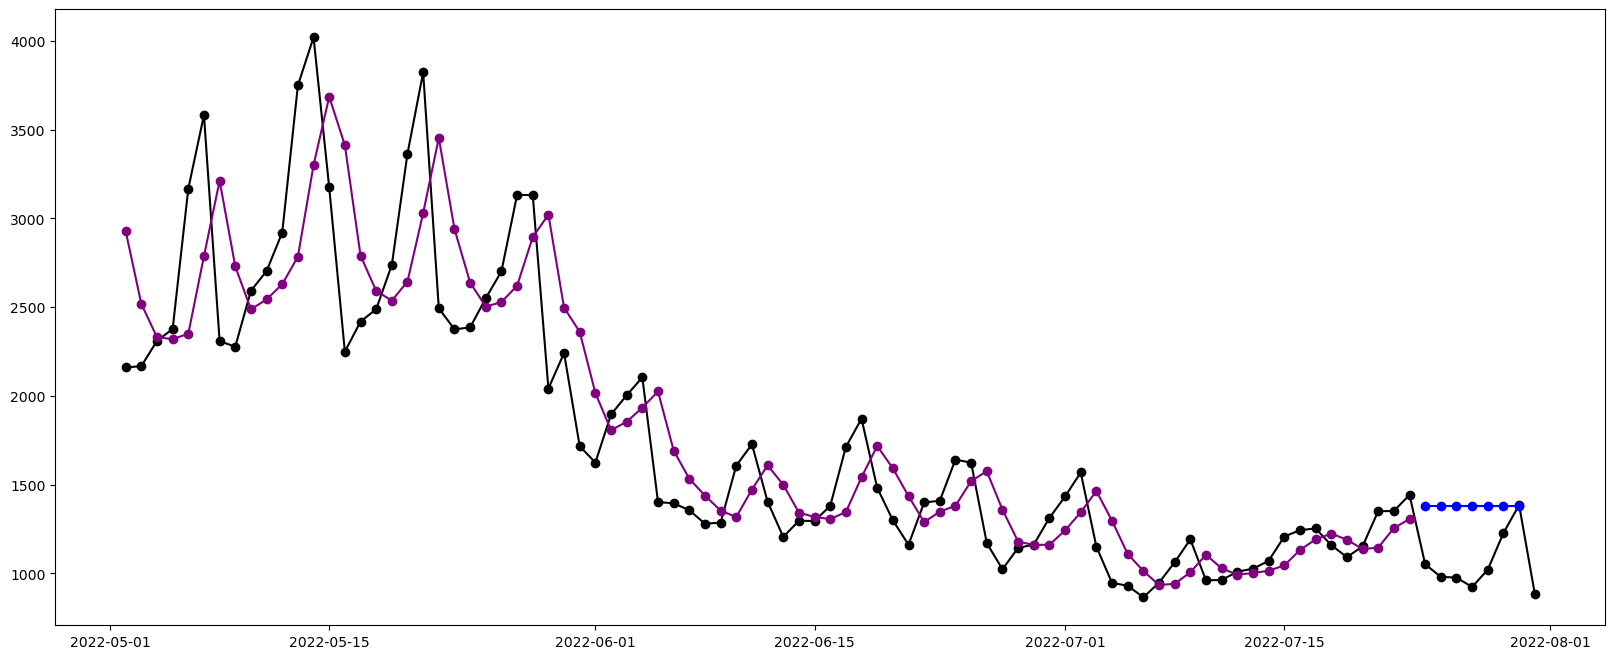

In [514]:
plt.figure(figsize=(20, 8))
plt.plot(cat_vp_di[1800:], marker="o", color="black")
plt.plot(fit3.fittedvalues[1800:], marker="o", color="purple")
(line3,) = plt.plot(fcast3, marker="o", color="blue")

In [515]:
fcast3

2022-07-24    1378.743095
2022-07-25    1378.743095
2022-07-26    1378.743095
2022-07-27    1378.743095
2022-07-28    1378.743095
2022-07-29    1378.743095
2022-07-30    1378.743095
Freq: D, Name: $\alpha=0.5345348837209302$, dtype: float64

In [ ]:
# Samaksh - features added check if relevant
# Look for more features
# Research about factor based model

# Saksham - Holiday, Quarter
#

#Shreyas - 

#Abhinav

In [521]:
cat_agg = proc.groupby(["CATEGORY_NAME","SALES_DATE"],as_index=False)["DAILY_UNITS"].sum()
cat_vp_di = cat_agg[cat_agg["CATEGORY_NAME"]=="VP - Digital Imaging"]
cat_vp_di = cat_vp_di.drop(["CATEGORY_NAME"],axis=1)

In [529]:
cat_vp_di["year"] = cat_vp_di["SALES_DATE"].dt.year
cat_vp_di["month"] = cat_vp_di["SALES_DATE"].dt.month
cat_vp_di["day_of_week"] = cat_vp_di["SALES_DATE"].dt.dayofweek

<AxesSubplot:xlabel='year', ylabel='DAILY_UNITS'>

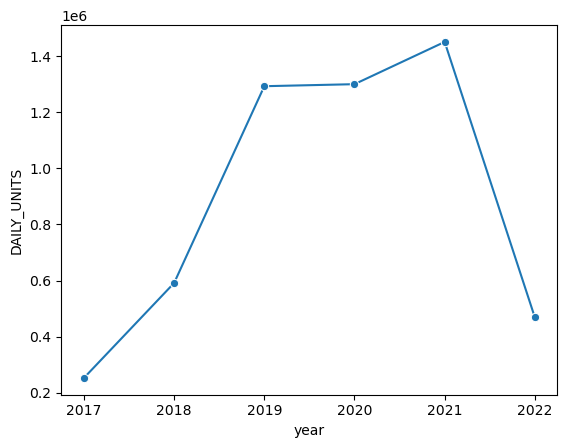

In [534]:
sns.lineplot(cat_vp_di.groupby("year")["DAILY_UNITS"].sum(),marker="o")

In [540]:
cat_vp_di_y_m = cat_vp_di.groupby(["year","month"],as_index=False)["DAILY_UNITS"].sum()

C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\4127485132.py:1: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=cat_vp_di_y_m,x="month",y="DAILY_UNITS",marker="o",hue="year",palette=sns.color_palette("tab10"))


<AxesSubplot:xlabel='month', ylabel='DAILY_UNITS'>

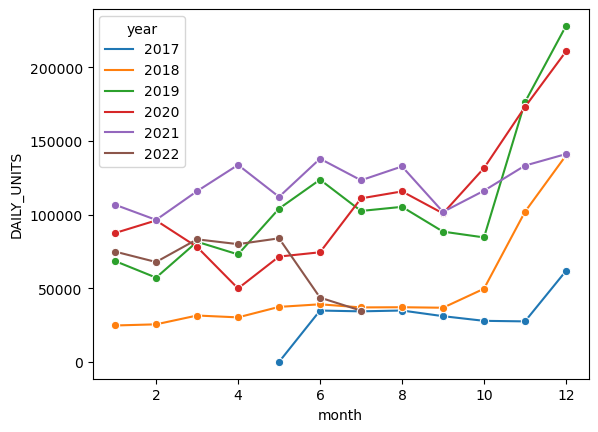

In [542]:
sns.lineplot(data=cat_vp_di_y_m,x="month",y="DAILY_UNITS",marker="o",hue="year",palette=sns.color_palette("tab10"))

C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\2727995997.py:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=cat_vp_di_d,x="day_of_week",y="DAILY_UNITS",marker="o",hue="year",palette=sns.color_palette("tab10"))


<AxesSubplot:xlabel='day_of_week', ylabel='DAILY_UNITS'>

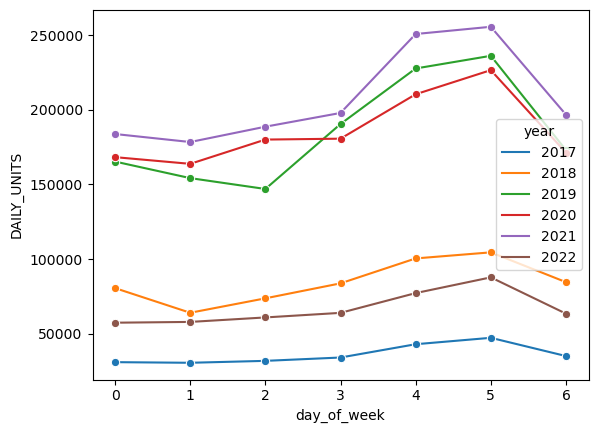

In [544]:
cat_vp_di_d = cat_vp_di.groupby(["year","day_of_week"],as_index=False)["DAILY_UNITS"].sum()
sns.lineplot(data=cat_vp_di_d,x="day_of_week",y="DAILY_UNITS",marker="o",hue="year",palette=sns.color_palette("tab10"))

In [549]:
cat_vp_di["quarter"] = np.where(cat_vp_di.month.isin([1,2,3]),1,\
                                np.where(cat_vp_di.month.isin([4,5,6]),2,\
                                    np.where(cat_vp_di.month.isin([7,8,9]),3,\
                                        np.where(cat_vp_di.month.isin([10,11,12]),4,np.nan)
                                            )
                                        )        
                                )

C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\799169869.py:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=cat_vp_di_q,x="quarter",y="DAILY_UNITS",marker="o",hue="year",palette=sns.color_palette("tab10"))


<AxesSubplot:xlabel='quarter', ylabel='DAILY_UNITS'>

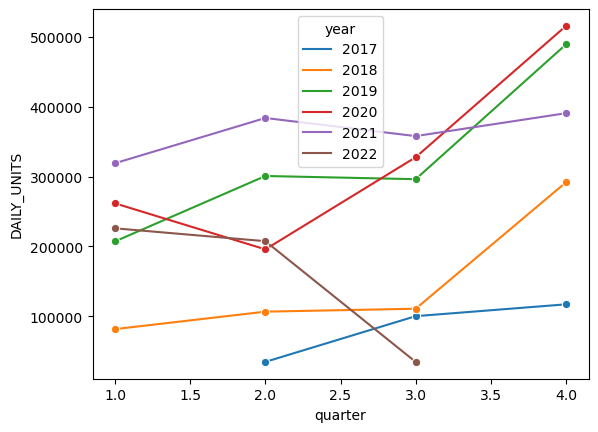

In [551]:
cat_vp_di_q = cat_vp_di.groupby(["year","quarter"],as_index=False)["DAILY_UNITS"].sum()
sns.lineplot(data=cat_vp_di_q,x="quarter",y="DAILY_UNITS",marker="o",hue="year",palette=sns.color_palette("tab10"))

In [554]:
cat_vp_di["week"] = cat_vp_di["SALES_DATE"].dt.isocalendar().week

In [555]:
cat_vp_di

,SALES_DATE,DAILY_UNITS,year,month,day_of_week,quarter,week
0,2017-05-28,0,2017,5,6,2.0,21
1,2017-05-29,0,2017,5,0,2.0,22
2,2017-05-30,0,2017,5,1,2.0,22
3,2017-05-31,0,2017,5,2,2.0,22
4,2017-06-01,0,2017,6,3,2.0,22
...,...,...,...,...,...,...,...
1886,2022-07-27,923,2022,7,2,3.0,30
1887,2022-07-28,1021,2022,7,3,3.0,30
1888,2022-07-29,1227,2022,7,4,3.0,30
1889,2022-07-30,1385,2022,7,5,3.0,30


In [564]:
cat_vp_di_y_w = cat_vp_di.groupby(["year","week"],as_index=False)["DAILY_UNITS"].sum()

In [568]:
# cat_vp_di_y_w["DAILY_UNITS"] = cat_vp_di_y_w["DAILY_UNITS"].astype("float")\
cat_vp_di_y_w["week"] = cat_vp_di_y_w["week"].astype(int)

C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\123648738.py:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=cat_vp_di_y_w.loc[cat_vp_di_y_w["year"].isin([2017,2018,2019,2020,2021,2022])],x="week",y="DAILY_UNITS",hue="year",palette=sns.color_palette("tab10"))


<AxesSubplot:xlabel='week', ylabel='DAILY_UNITS'>

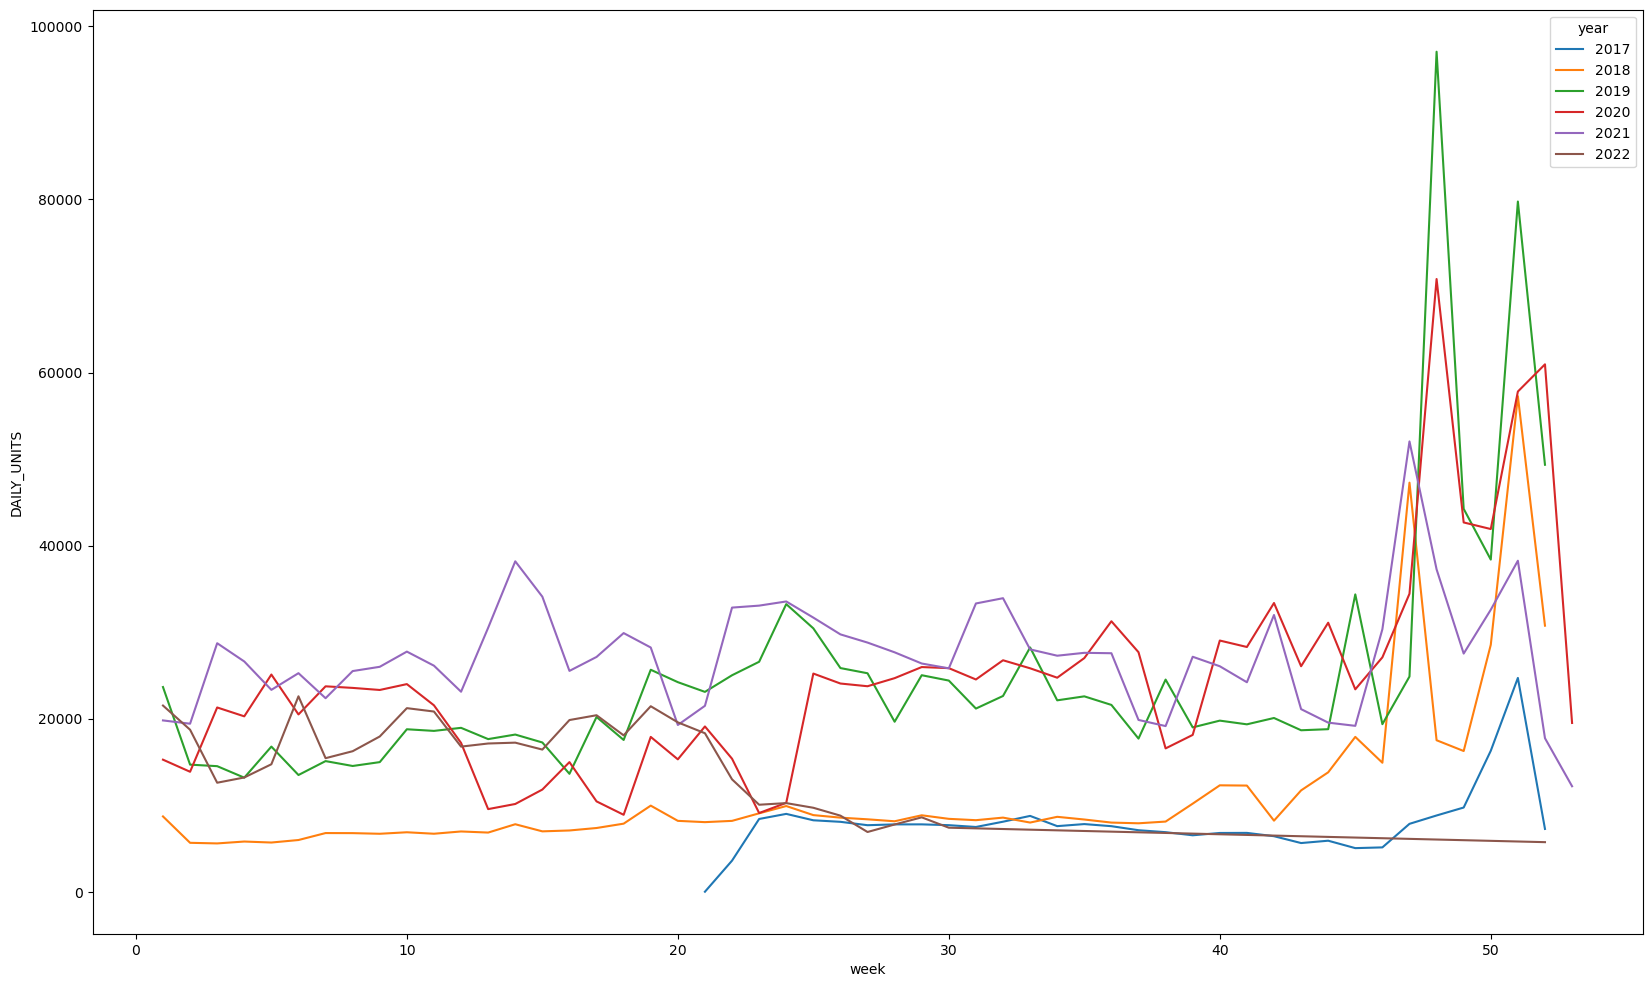

In [706]:
plt.figure(figsize=(20,12))
sns.lineplot(data=cat_vp_di_y_w.loc[cat_vp_di_y_w["year"].isin([2017,2018,2019,2020,2021,2022])],x="week",y="DAILY_UNITS",hue="year",palette=sns.color_palette("tab10"))

C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\3699158994.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data=cat_vp_di_y_w.loc[cat_vp_di_y_w["year"].isin([2020,2022])],x="week",y="DAILY_UNITS",hue="year",palette=sns.color_palette("tab10"))


<AxesSubplot:xlabel='week', ylabel='DAILY_UNITS'>

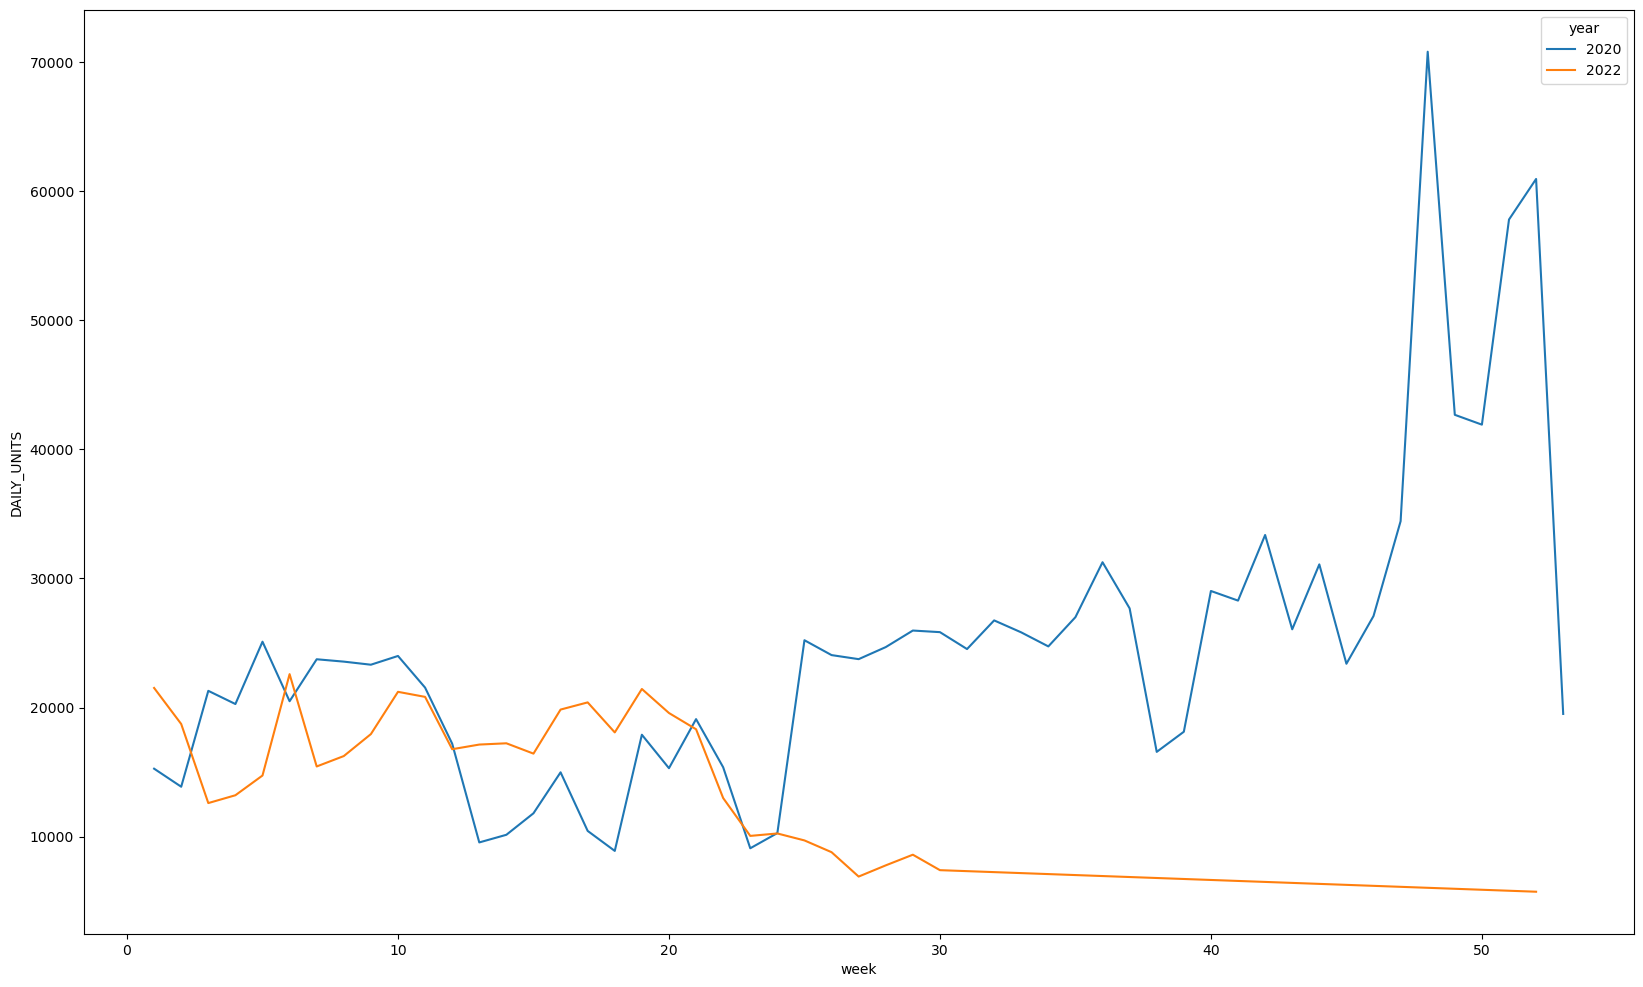

In [582]:
plt.figure(figsize=(20,12))
sns.lineplot(data=cat_vp_di_y_w.loc[cat_vp_di_y_w["year"].isin([2020,2022])],x="week",y="DAILY_UNITS",hue="year",palette=sns.color_palette("tab10"))

In [ ]:
sns.lineplot(data=cat_vp_di_q,x="quarter",y="DAILY_UNITS",marker="o",hue="year",palette=sns.color_palette("tab10"))

In [583]:
proc

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,year,day_of_year
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,1,2017,9_28
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,18,2017,11_24
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,NaN,46.98,Constrained,7,2019,11_28
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,NaN,498.00,Fully-Stocked,6,2021,4_21
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,7,2018,10_27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846627,67,2020-11-16,DRONE ACCESSORY,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,16.99,NaN,16.00,Fully-Stocked,0,2020,11_16
846628,482,2021-05-06,MOBILE PHONE MEDIA,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,17.99,NaN,NaN,Fully-Stocked,0,2021,5_6
846629,384,2021-09-25,SO CAR ACCESSORIES,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,16.99,NaN,15.72,Fully-Stocked,3,2021,9_25
846630,113,2018-11-08,CAMERA PRO PRODUCTS,DIGITAL CAMCORDERS,ML - P&S and Action Cams and Drones,VP - Digital Imaging,1899.99,NaN,NaN,Fully-Stocked,0,2018,11_8


In [585]:
cat_vp_di_unagg = proc[proc["CATEGORY_NAME"]=="VP - Digital Imaging"]

In [588]:
cat_vp_di_unagg.groupby("year",as_index=False)["Encoded_SKU_ID"].nunique()

,year,Encoded_SKU_ID
0,2017,71
1,2018,102
2,2019,140
3,2020,186
4,2021,186
5,2022,185


In [587]:
cat_vp_di_unagg

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,year,day_of_year
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,1,2017,9_28
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,18,2017,11_24
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,7,2018,10_27
8,8,2022-03-04,ACTION CAM ACCY,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,19.99,NaN,13.32,Fully-Stocked,5,2022,3_4
9,9,2021-07-09,DIGITAL VIDEO,DIGITAL CAMCORDERS,ML - P&S and Action Cams and Drones,VP - Digital Imaging,599.99,NaN,597.99,Fully-Stocked,15,2021,7_9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846620,408,2020-08-15,TRIPODS,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,99.99,NaN,98.00,Fully-Stocked,1,2020,8_15
846623,32,2018-11-29,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,74.99,NaN,NaN,Fully-Stocked,2,2018,11_29
846627,67,2020-11-16,DRONE ACCESSORY,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,16.99,NaN,16.00,Fully-Stocked,0,2020,11_16
846628,482,2021-05-06,MOBILE PHONE MEDIA,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,17.99,NaN,NaN,Fully-Stocked,0,2021,5_6


C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\190111785.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data=cat_vp_di_y_w.loc[cat_vp_di_y_w["year"].isin([2017,2018])],x="week",y="DAILY_UNITS",hue="year",palette=sns.color_palette("tab10"))


<AxesSubplot:xlabel='week', ylabel='DAILY_UNITS'>

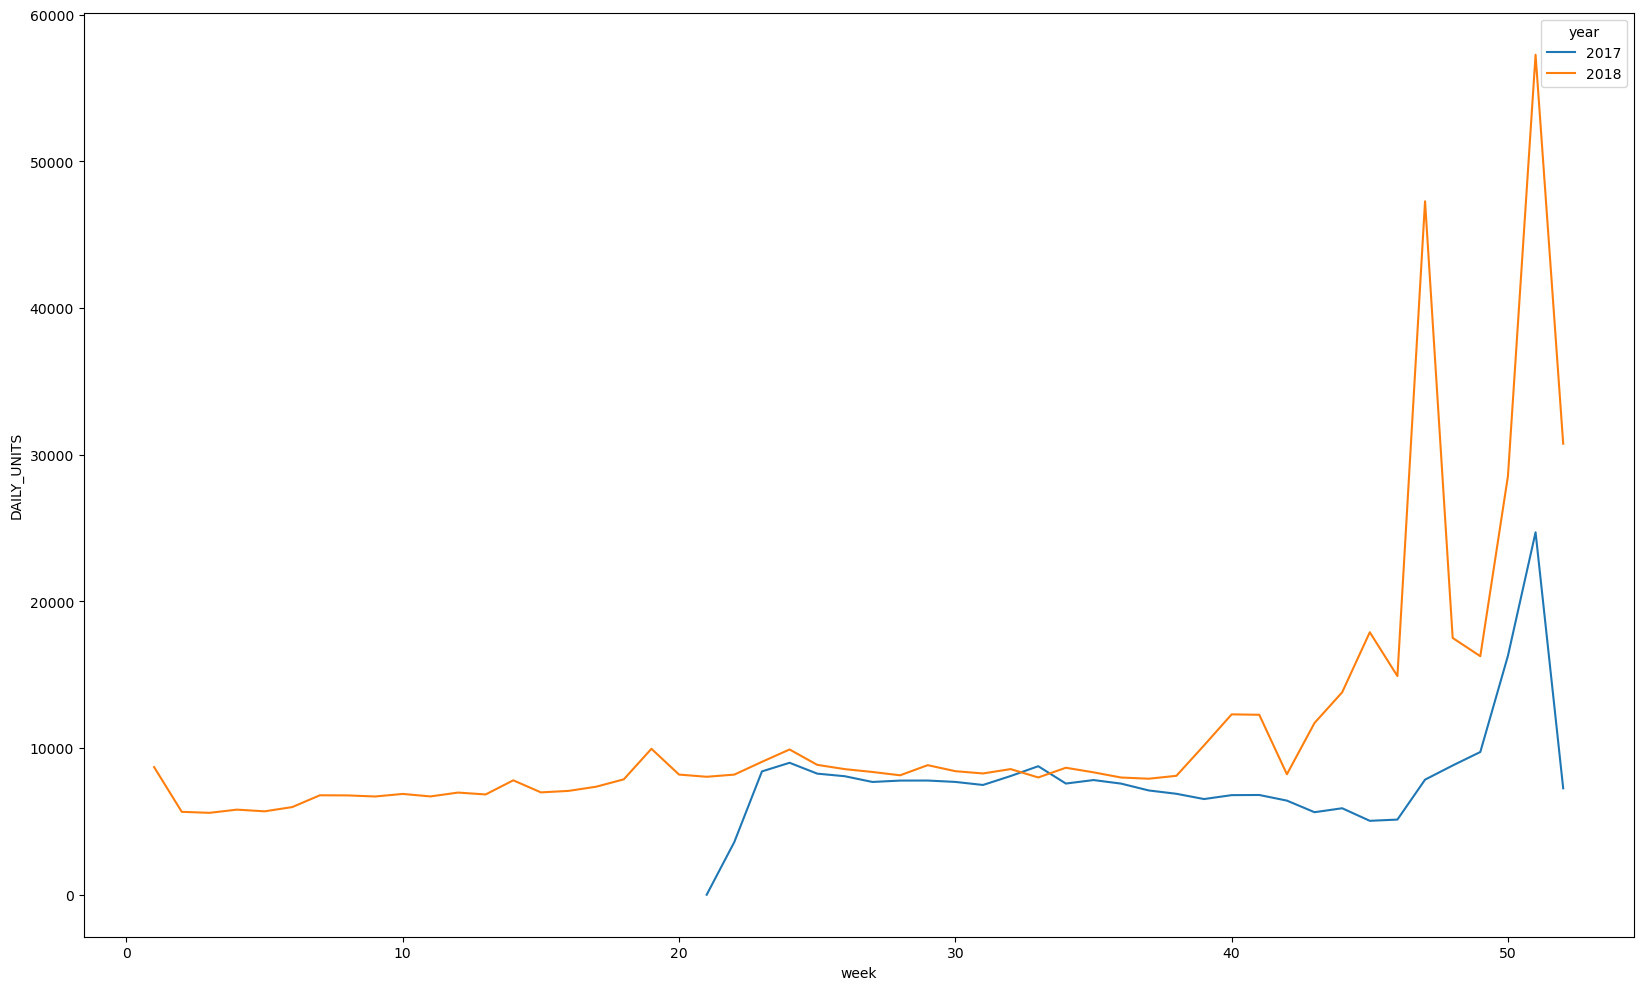

In [595]:
plt.figure(figsize=(20,12))
sns.lineplot(data=cat_vp_di_y_w.loc[cat_vp_di_y_w["year"].isin([2017,2018])],x="week",y="DAILY_UNITS",hue="year",palette=sns.color_palette("tab10"))

C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\1629490726.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data=cat_vp_di_y_w.loc[cat_vp_di_y_w["year"].isin([2019,2022])],x="week",y="DAILY_UNITS",hue="year",palette=sns.color_palette("tab10"))


<AxesSubplot:xlabel='week', ylabel='DAILY_UNITS'>

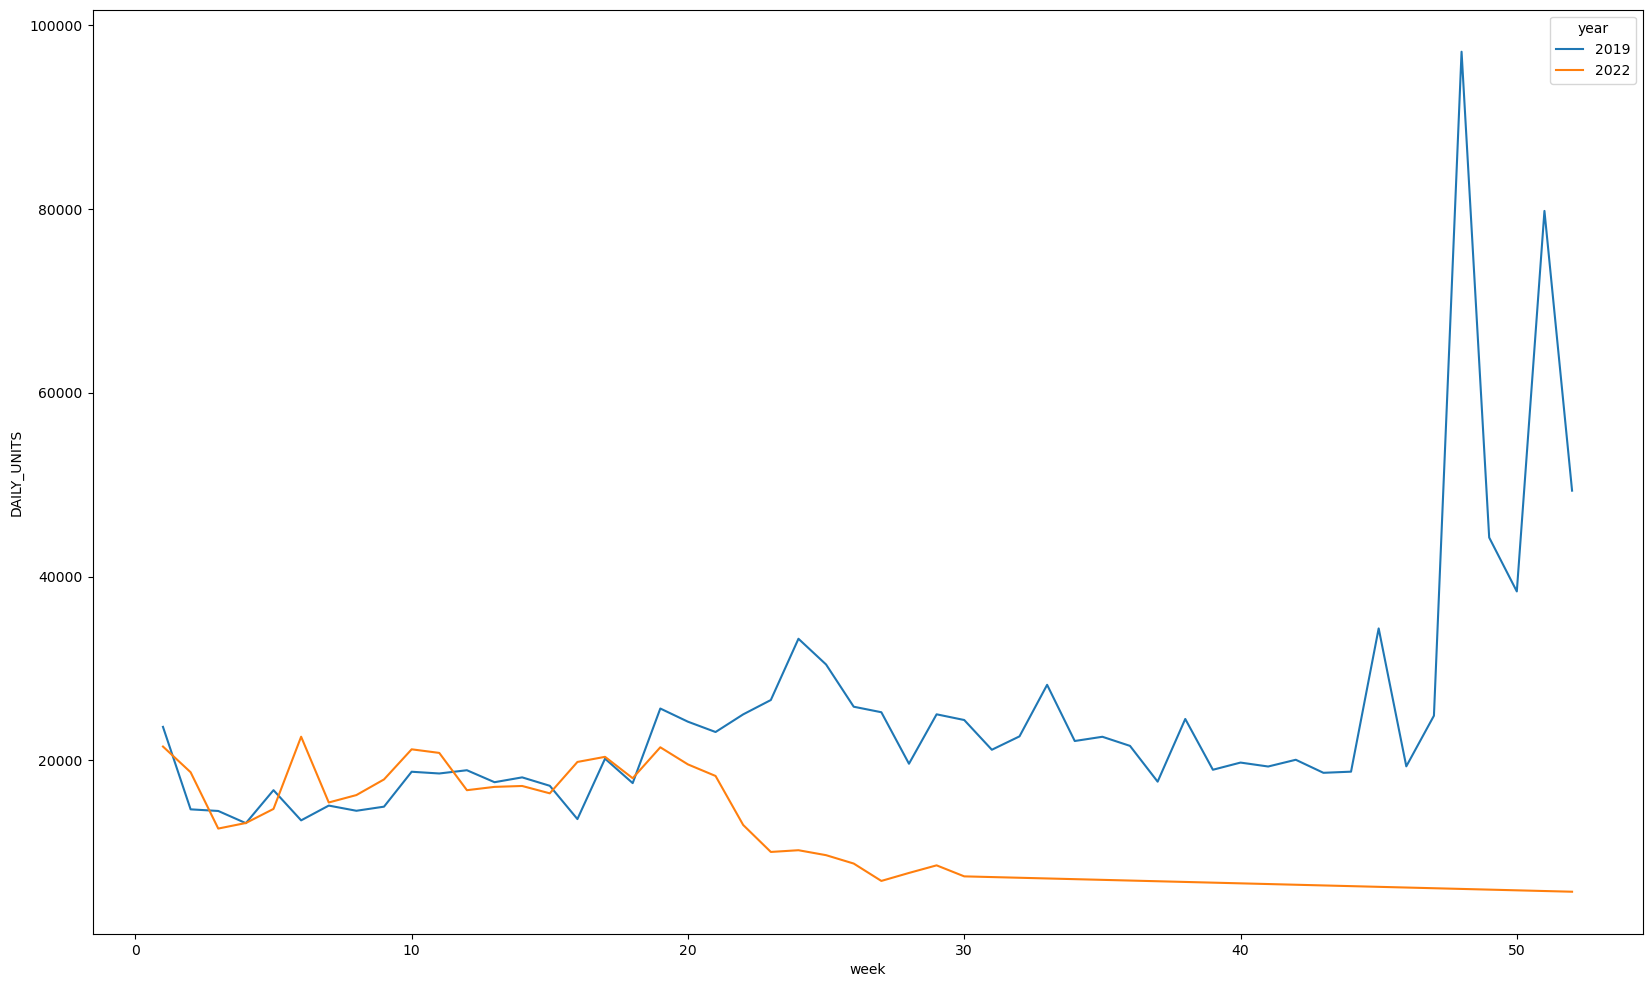

In [593]:
plt.figure(figsize=(20,12))
sns.lineplot(data=cat_vp_di_y_w.loc[cat_vp_di_y_w["year"].isin([2019,2022])],x="week",y="DAILY_UNITS",hue="year",palette=sns.color_palette("tab10"))

In [596]:
proc.shape

(846632, 13)

In [598]:
proc["SALES_DATE"].min()

Timestamp('2017-05-28 00:00:00')

In [601]:
list_of_SKUS_2017_cat_vp_di = cat_vp_di_unagg[cat_vp_di_unagg["year"]==2017]["Encoded_SKU_ID"].unique()
len(list_of_SKUS_2017_cat_vp_di)

71

In [615]:
cat_vp_di_unagg["week"] = cat_vp_di_unagg["SALES_DATE"].dt.isocalendar().week.astype(int)

C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\1316281275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_vp_di_unagg["week"] = cat_vp_di_unagg["SALES_DATE"].dt.isocalendar().week.astype(int)


In [625]:
print(proc[proc["CATEGORY_NAME"]=="VP - Digital Imaging"]["Encoded_SKU_ID"].nunique(),
proc[(proc["CATEGORY_NAME"]=="VP - Digital Imaging") & (proc.year.isin([2017])) ]["Encoded_SKU_ID"].nunique())

186 102


In [616]:
cat_vp_di_unagg = cat_vp_di_unagg.loc[cat_vp_di_unagg["Encoded_SKU_ID"].isin(list_of_SKUS_2017_cat_vp_di)]

In [617]:
cat_vp_di_unagg.groupby(["year"])["Encoded_SKU_ID"].nunique()

year
2017    71
2018    71
2019    71
2020    71
2021    71
2022    71
Name: Encoded_SKU_ID, dtype: int64

In [618]:
cat_vp_di_agg = cat_vp_di_unagg.groupby(["year","week"],as_index=False)["DAILY_UNITS"].sum()

In [619]:
cat_vp_di_agg

,year,week,DAILY_UNITS
0,2017,21,0
1,2017,22,3592
2,2017,23,8407
3,2017,24,8995
4,2017,25,8255
...,...,...,...
268,2022,27,1455
269,2022,28,1673
270,2022,29,1370
271,2022,30,1354


C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\528793721.py:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=cat_vp_di_agg,x="week",y="DAILY_UNITS",hue="year",palette=sns.color_palette("tab10"))


<AxesSubplot:xlabel='week', ylabel='DAILY_UNITS'>

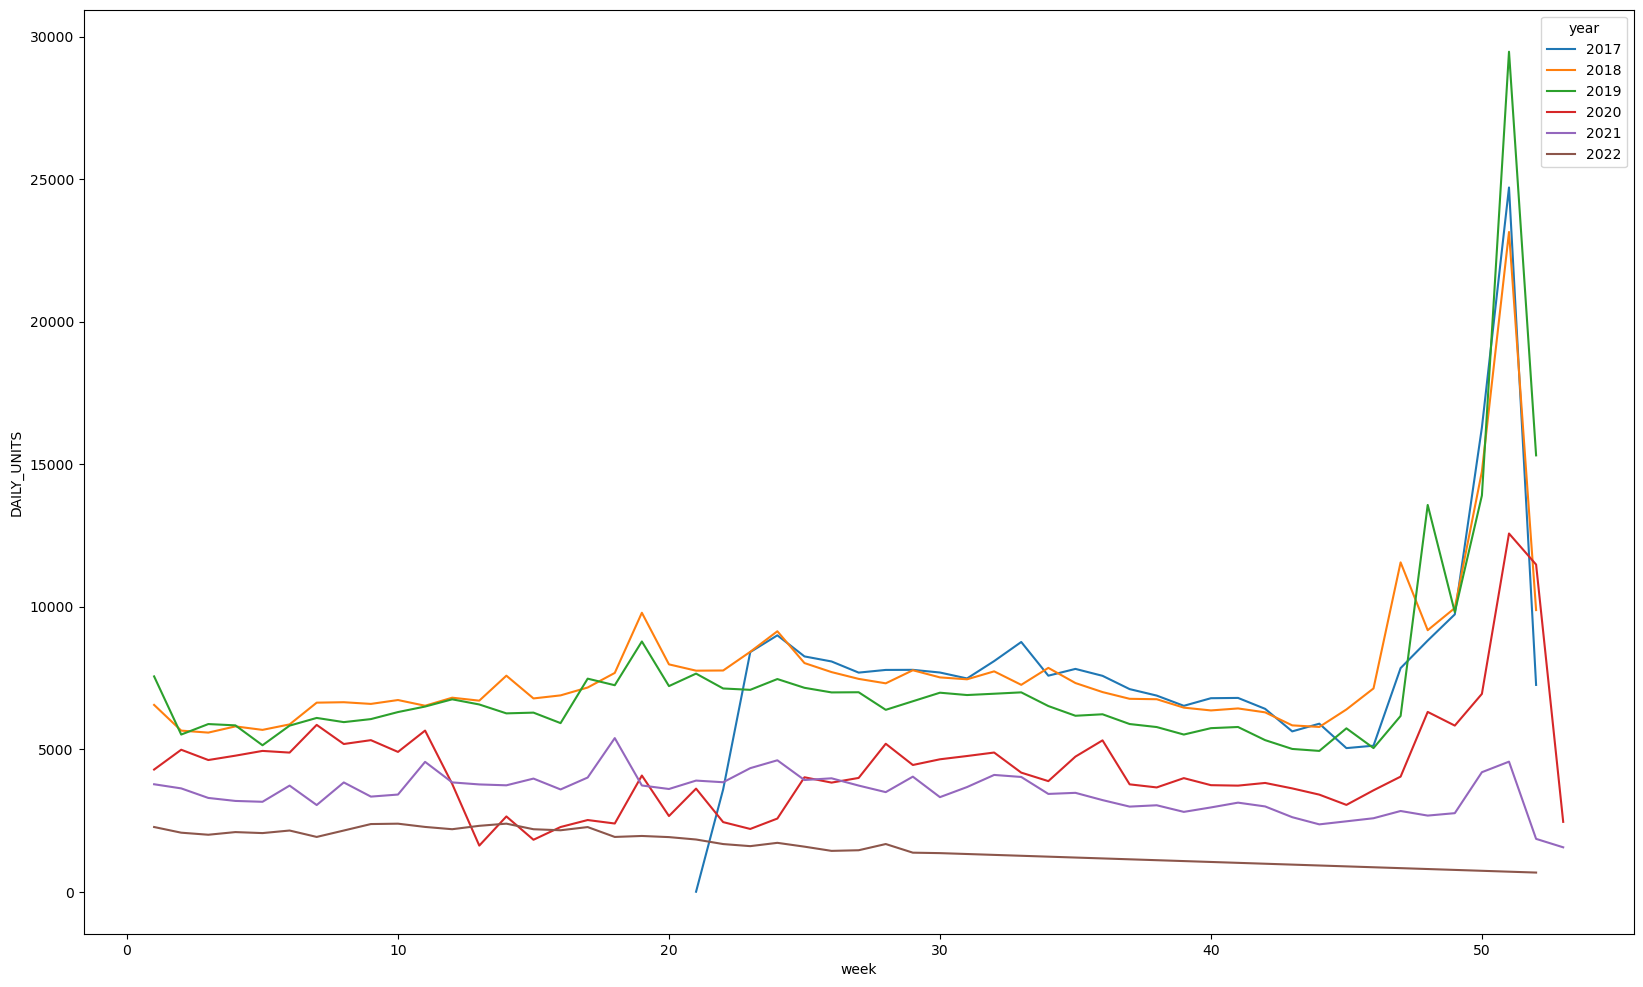

In [620]:
plt.figure(figsize=(20,12))
sns.lineplot(data=cat_vp_di_agg,x="week",y="DAILY_UNITS",hue="year",palette=sns.color_palette("tab10"))

In [627]:
cat_vp_di_unagg

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,year,day_of_year,week
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,1,2017,9_28,39
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,18,2017,11_24,47
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,7,2018,10_27,43
9,9,2021-07-09,DIGITAL VIDEO,DIGITAL CAMCORDERS,ML - P&S and Action Cams and Drones,VP - Digital Imaging,599.99,NaN,597.99,Fully-Stocked,15,2021,7_9,27
12,12,2018-11-08,MIRRORLESS LENSES,LENSES,ML - ILC Cameras/Lenses,VP - Digital Imaging,999.99,NaN,NaN,Fully-Stocked,2,2018,11_8,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846601,32,2018-10-14,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,74.99,NaN,NaN,Fully-Stocked,3,2018,10_14,41
846603,434,2018-02-16,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Out-of-Stock,6,2018,2_16,7
846611,270,2022-06-04,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,44.99,NaN,NaN,Fully-Stocked,3,2022,6_4,22
846619,84,2018-11-17,CC MICROPHONES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,80.99,NaN,NaN,Fully-Stocked,2,2018,11_17,46


In [630]:
new_data = cat_vp_di_unagg.groupby("SALES_DATE",as_index=False)["DAILY_UNITS"].sum()
print(cat_vp_di_unagg.Encoded_SKU_ID.nunique())
new_data.tail()

71


,SALES_DATE,DAILY_UNITS
1886,2022-07-27,176
1887,2022-07-28,194
1888,2022-07-29,210
1889,2022-07-30,220
1890,2022-07-31,187


In [631]:
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [663]:
new_data_ind = new_data.set_index("SALES_DATE",inplace=False)

<AxesSubplot:title={'center':'Passengers Data'}, xlabel='SALES_DATE'>

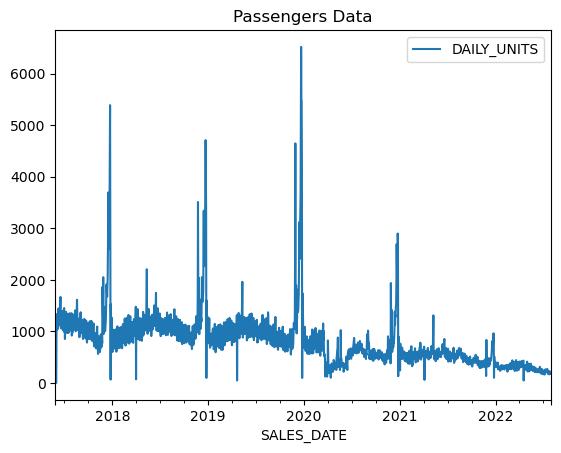

In [664]:
new_data_ind[['DAILY_UNITS']].plot(title='Passengers Data')


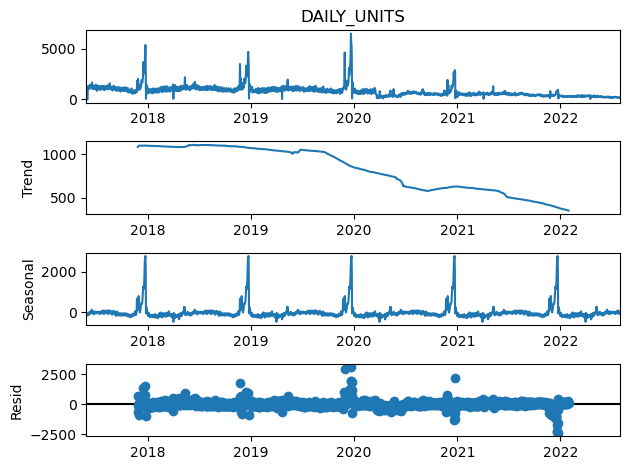

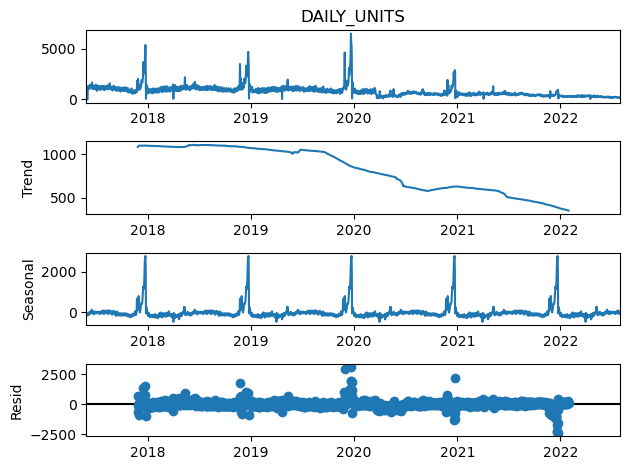

In [708]:
decompose_result = seasonal_decompose(new_data_ind["DAILY_UNITS"],model="additive",period=365)
decompose_result.plot()

In [638]:
new_data

,SALES_DATE,DAILY_UNITS
0,2017-05-28,0
1,2017-05-29,0
2,2017-05-30,0
3,2017-05-31,0
4,2017-06-01,0
...,...,...
1886,2022-07-27,176
1887,2022-07-28,194
1888,2022-07-29,210
1889,2022-07-30,220


In [669]:
new_data = new_data.drop("HWES3_ADD",axis=1)

In [670]:
new_data.dtypes
type(new_data)
train = new_data[:1883]
test = new_data[1884:]

In [671]:
train.shape,test.shape

((1883, 2), (7, 2))

In [672]:
model = ExponentialSmoothing(np.array(train["DAILY_UNITS"]),trend="add",seasonal="add",seasonal_periods=365)

c:\Users\saksham\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\678263474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["HWES3_ADD"] = model.fit().fittedvalues


<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}>

<Figure size 2000x3000 with 0 Axes>

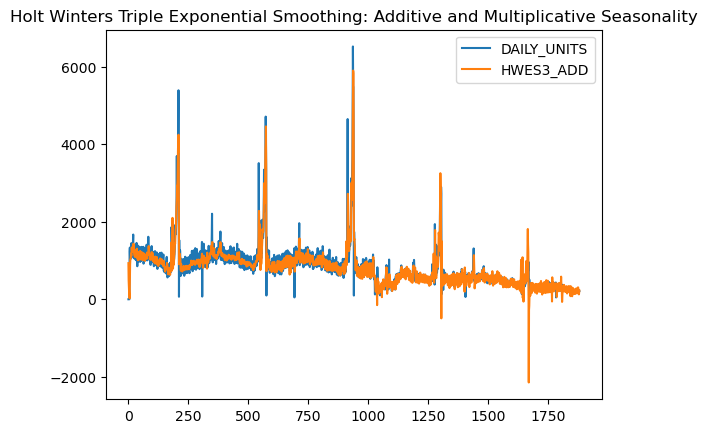

In [673]:
train["HWES3_ADD"] = model.fit().fittedvalues
plt.figure(figsize=(20,30))
train[["DAILY_UNITS","HWES3_ADD"]].plot(title="Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality")

In [674]:
model.fit().fittedvalues

c:\Users\saksham\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


array([931.48747528, 483.21968393, 343.04539725, ..., 126.1797763 ,
       159.48990822, 223.52108578])

In [678]:
test_pred = model.fit().forecast(7)

c:\Users\saksham\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [681]:
test["pred"] = test_pred

C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\1796342394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pred"] = test_pred


In [682]:
train_pred = model.fit().fittedvalues

c:\Users\saksham\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [683]:
train["pred"]=train_pred

C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\4022312352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["pred"]=train_pred


In [684]:
train

,SALES_DATE,DAILY_UNITS,HWES3_ADD,pred
0,2017-05-28,0,931.487475,931.487475
1,2017-05-29,0,483.219684,483.219684
2,2017-05-30,0,343.045397,343.045397
3,2017-05-31,0,166.156006,166.156006
4,2017-06-01,0,141.518784,141.518784
...,...,...,...,...
1878,2022-07-19,181,267.160019,267.160019
1879,2022-07-20,194,161.150256,161.150256
1880,2022-07-21,203,126.179776,126.179776
1881,2022-07-22,235,159.489908,159.489908


In [685]:
test

,SALES_DATE,DAILY_UNITS,pred
1884,2022-07-25,179,272.371429
1885,2022-07-26,188,331.634841
1886,2022-07-27,176,308.209618
1887,2022-07-28,194,234.660742
1888,2022-07-29,210,151.724304
1889,2022-07-30,220,171.271995
1890,2022-07-31,187,196.234225


In [687]:
train = train.drop("HWES3_ADD",axis=1)

In [691]:
train["data_type"] = "train"
test["data_type"] = "test"
master = pd.concat([train,test],axis=0)

C:\Users\saksham\AppData\Local\Temp\ipykernel_2368\519221195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["data_type"] = "test"


In [721]:
master[(master["SALES_DATE"]>="2021-12-24") & (master["SALES_DATE"]<="2021-12-31") ]

,SALES_DATE,DAILY_UNITS,pred,data_type
1671,2021-12-24,800,-2146.215513,train
1672,2021-12-25,101,-273.847794,train
1673,2021-12-26,510,-170.295582,train
1674,2021-12-27,377,86.250583,train
1675,2021-12-28,384,140.108145,train
1676,2021-12-29,320,185.076961,train
1677,2021-12-30,409,89.340925,train
1678,2021-12-31,364,119.820819,train


<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}>

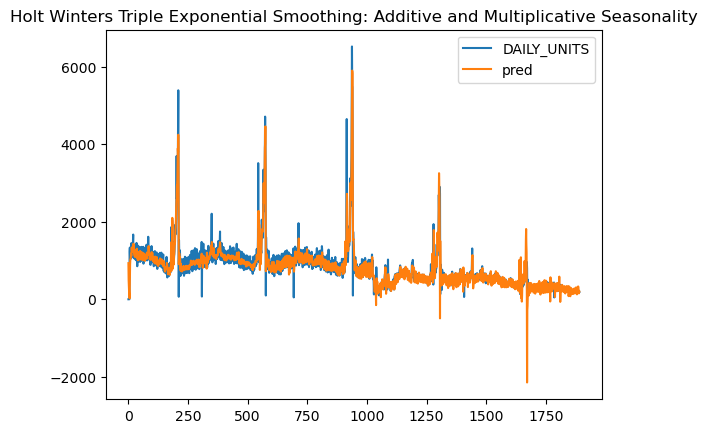

In [696]:
master[["DAILY_UNITS","pred"]].plot(title="Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality")

<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}>

<Figure size 1500x2000 with 0 Axes>

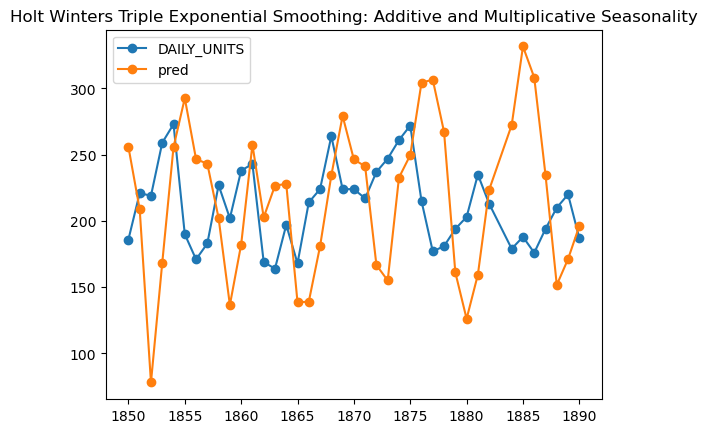

In [701]:
plt.figure(figsize=(15,20))
master[["DAILY_UNITS","pred"]][1850:].plot(title="Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality",marker="o")

In [702]:
master

,SALES_DATE,DAILY_UNITS,pred,data_type
0,2017-05-28,0,931.487475,train
1,2017-05-29,0,483.219684,train
2,2017-05-30,0,343.045397,train
3,2017-05-31,0,166.156006,train
4,2017-06-01,0,141.518784,train
...,...,...,...,...
1886,2022-07-27,176,308.209618,test
1887,2022-07-28,194,234.660742,test
1888,2022-07-29,210,151.724304,test
1889,2022-07-30,220,171.271995,test


In [715]:
mean_squared_error(master[1884:]["DAILY_UNITS"],master[1884:]["pred"],squared=False)

c:\Users\saksham\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


87.19651443067502

In [718]:
master[1884:]["DAILY_UNITS"].median()

191.0

In [717]:
master["DAILY_UNITS"].median()

732.0

In [711]:
master.head()

,SALES_DATE,DAILY_UNITS,pred,data_type
0,2017-05-28,0,931.487475,train
1,2017-05-29,0,483.219684,train
2,2017-05-30,0,343.045397,train
3,2017-05-31,0,166.156006,train
4,2017-06-01,0,141.518784,train


In [ ]:
master["DAILY_UNITS"].mean()

In [ ]:
#prophet on category 1 Samaksh
#time-series cross-validation evaluation Saksham
#heirarchal relation proportion + SKU Changes in Category- Abhinav
#date-based features random forest- Shreyas
